<a href="https://colab.research.google.com/github/DrTihami/Dr-Shabir-ahmad/blob/main/TimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!gdown 1-pOuGRd8zuAUKBll-1xkr7_867NwoWHg

Downloading...
From: https://drive.google.com/uc?id=1-pOuGRd8zuAUKBll-1xkr7_867NwoWHg
To: /content/mobilesales.xlsx
100% 13.7k/13.7k [00:00<00:00, 22.0MB/s]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (20, 6)

In [ ]:
mobile_sales = pd.read_excel("mobilesales.xlsx")
mobile_sales.head()

DATE   Sales
0 2001-01-01  6519.0
1 2001-02-01  6654.0
2 2001-03-01  7332.0
3 2001-04-01  7332.0
4 2001-05-01  8240.0

In [ ]:
mobile_sales.shape

(217, 2)

In [ ]:
mobile_sales.dtypes

DATE     datetime64[ns]
Sales           float64
dtype: object

In [ ]:
mobile_sales.Sales.describe()

count      198.000000
mean     10842.757576
std       2605.006293
min        108.000000
25%       8856.000000
50%      10745.000000
75%      12399.750000
max      23740.000000
Name: Sales, dtype: float64

In [ ]:
mobile_sales.DATE.describe()

count                              217
mean     2009-12-31 04:25:26.267281152
min                2001-01-01 00:00:00
25%                2005-07-01 00:00:00
50%                2010-01-01 00:00:00
75%                2014-07-01 00:00:00
max                2019-01-01 00:00:00
Name: DATE, dtype: object

In [ ]:
18*12 + 1

217

In [ ]:
mobile_sales.set_index('DATE', inplace=True)
mobile_sales

Sales
DATE               
2001-01-01   6519.0
2001-02-01   6654.0
2001-03-01   7332.0
2001-04-01   7332.0
2001-05-01   8240.0
...             ...
2018-09-01  13838.0
2018-10-01  15351.0
2018-11-01  15615.0
2018-12-01  16941.0
2019-01-01  12160.0

[217 rows x 1 columns]

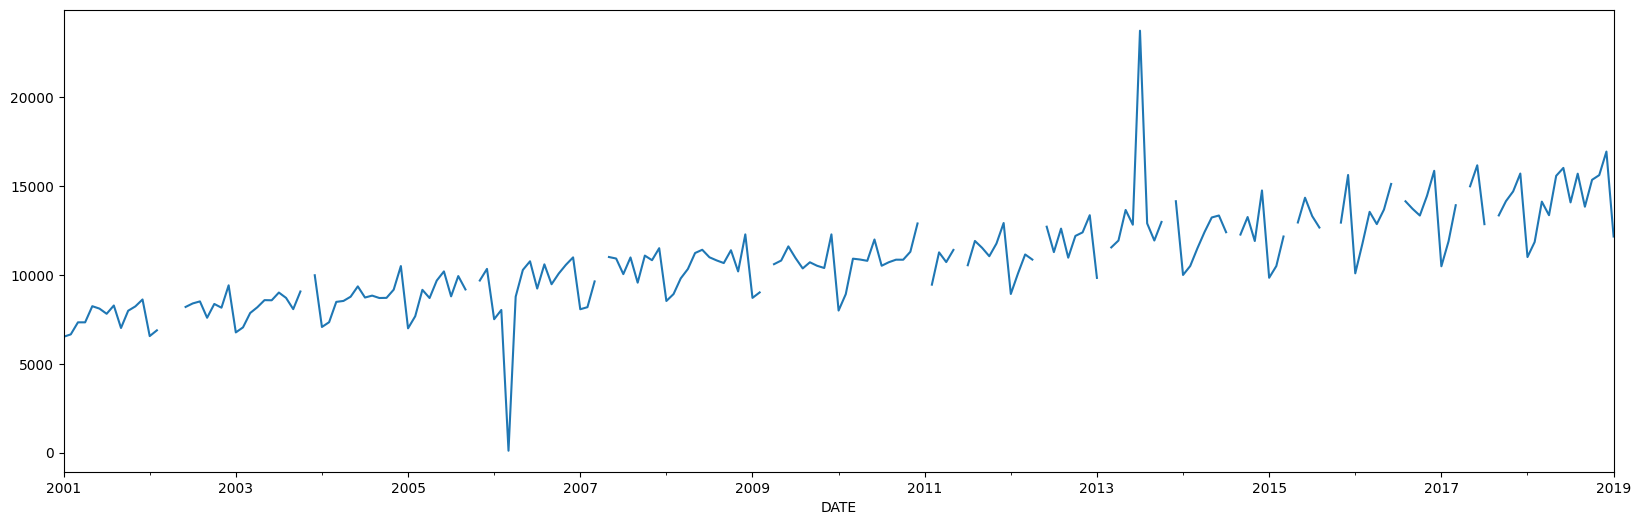

In [ ]:
mobile_sales.Sales.plot();

In [ ]:
mobile_sales.Sales.mean()

10842.757575757576

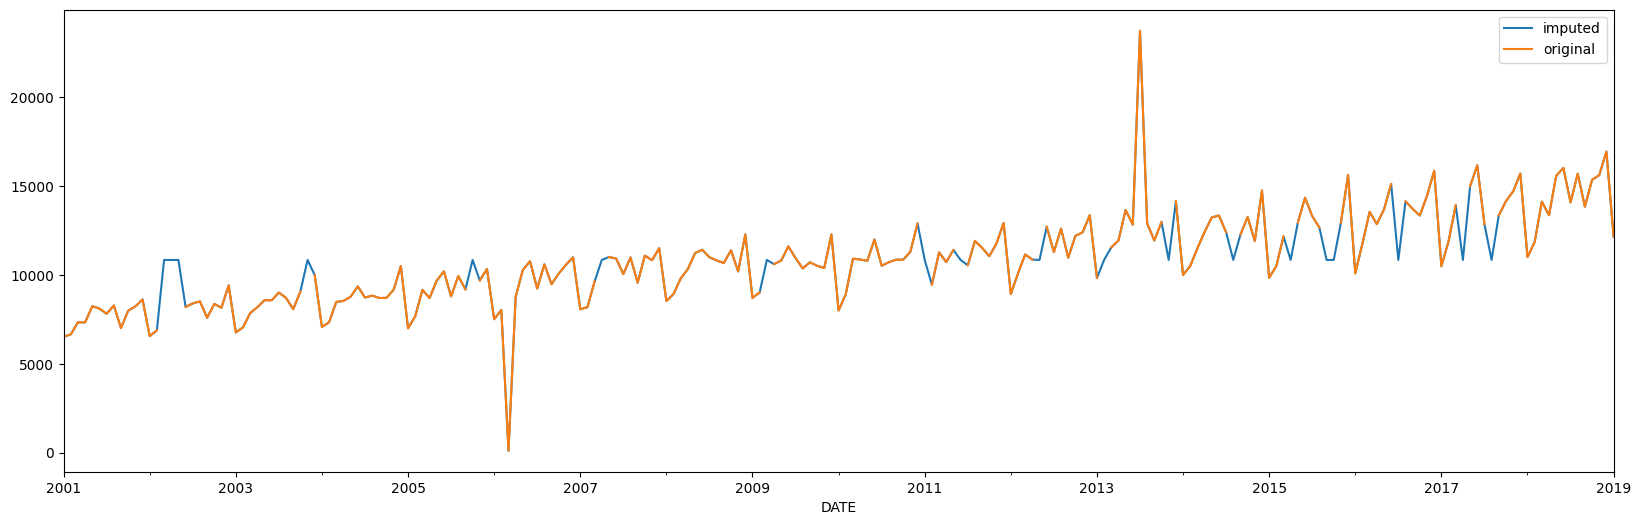

In [ ]:
mobile_sales.Sales.fillna(mobile_sales.Sales.mean()).plot(label='imputed')
mobile_sales.Sales.plot(label='original')
plt.legend()

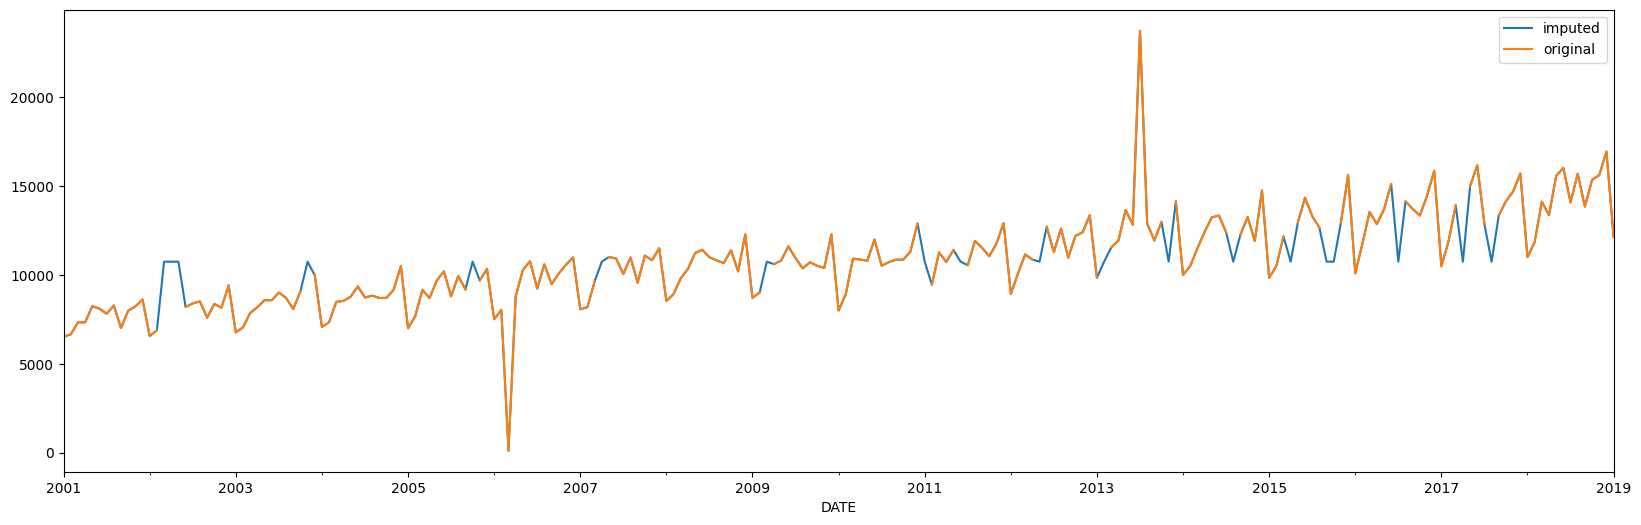

In [ ]:
mobile_sales.Sales.fillna(mobile_sales.Sales.median()).plot(label='imputed')
mobile_sales.Sales.plot(label='original')
plt.legend()

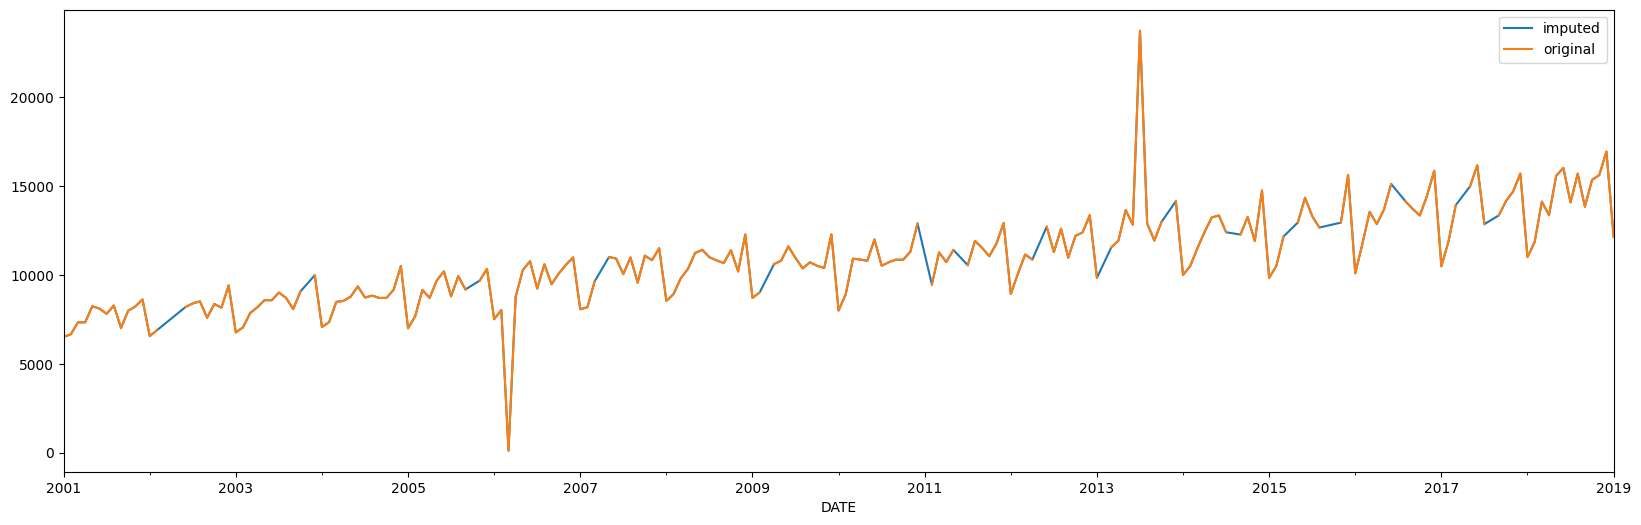

In [ ]:
mobile_sales.Sales.interpolate(method='linear').plot(label='imputed')
mobile_sales.Sales.plot(label='original')
plt.legend()

In [ ]:
mobile_sales.Sales = mobile_sales.Sales.interpolate(method='linear')

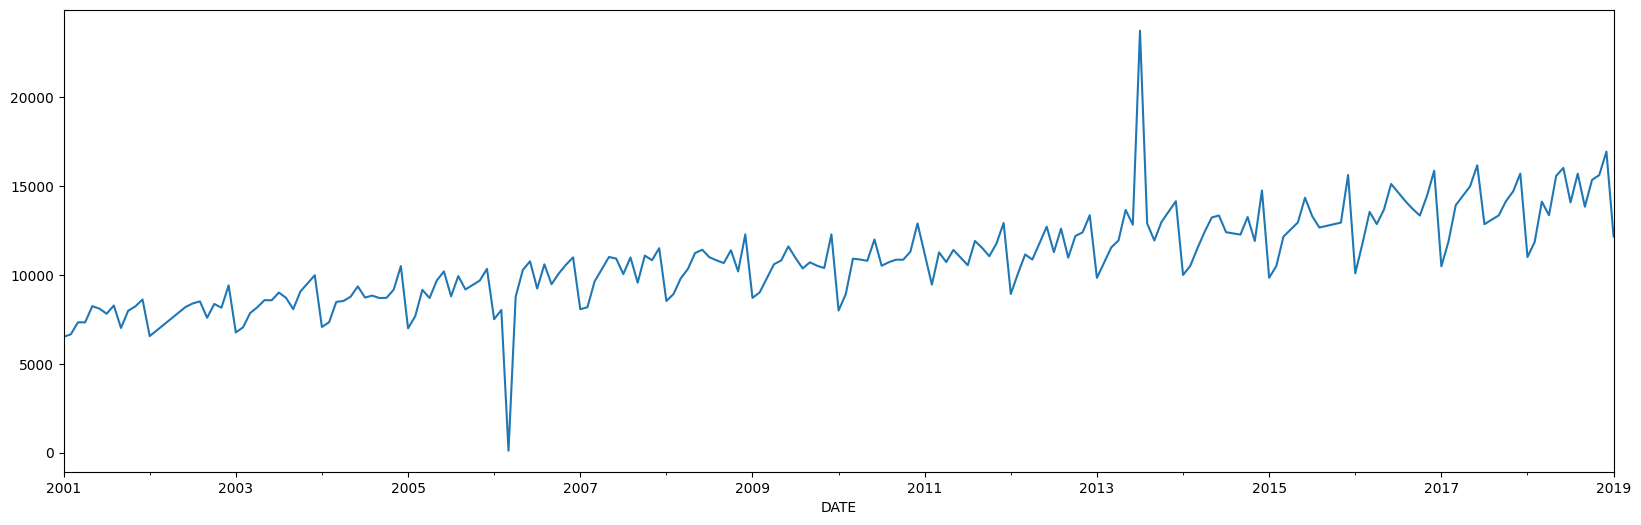

In [ ]:
mobile_sales.Sales.plot();

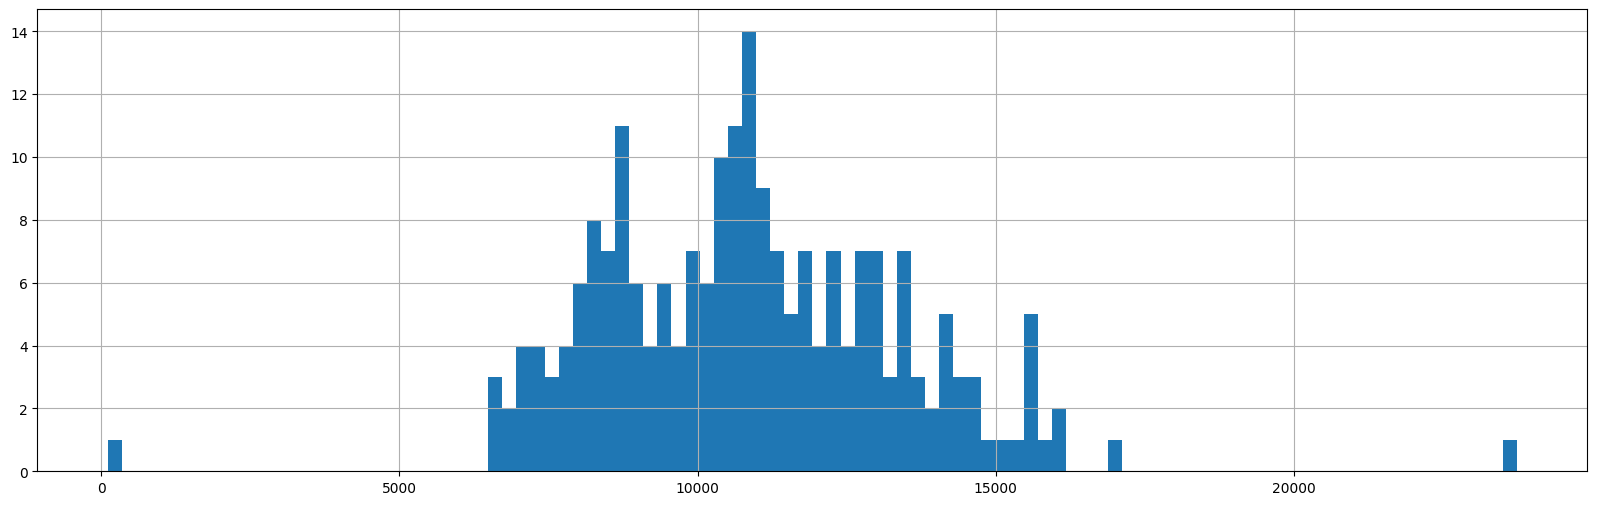

In [ ]:
mobile_sales.Sales.hist(bins = 100).plot();

In [ ]:
mobile_sales.Sales.quantile(0.99)

16144.480000000001

In [ ]:
mobile_sales.Sales.quantile(0.01)

6573.36

<Axes: xlabel='DATE'>

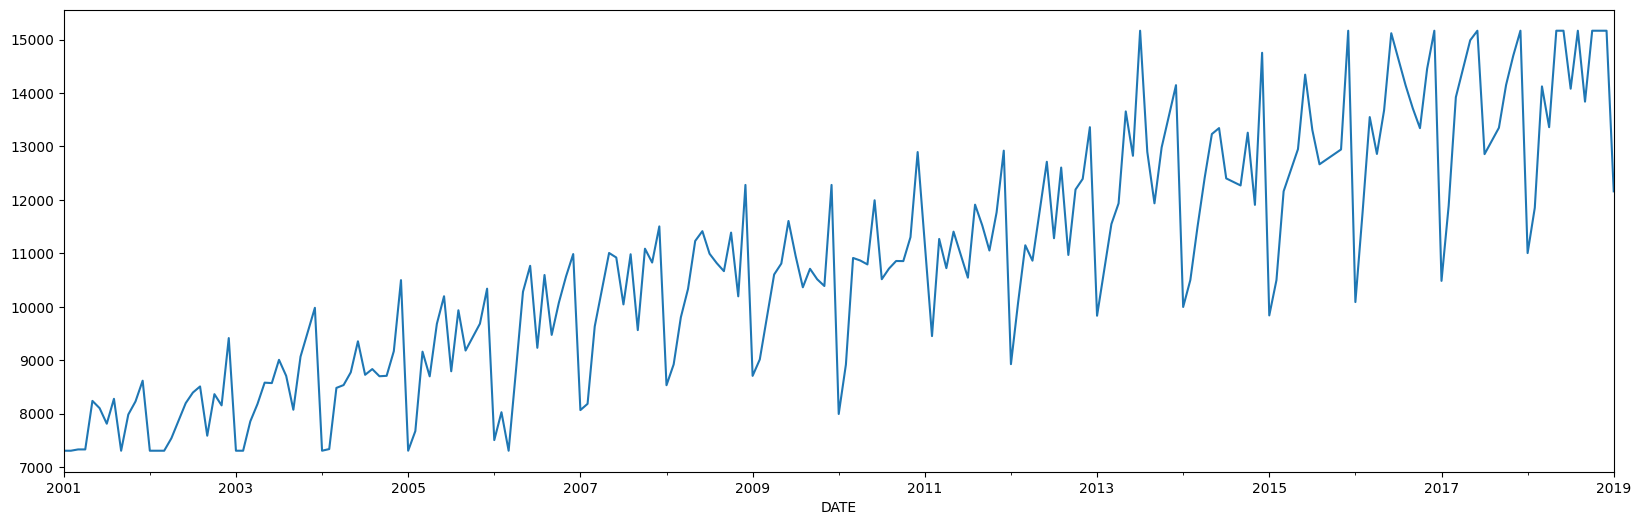

In [ ]:
mobile_sales.Sales.clip(upper=mobile_sales.Sales.quantile(0.95),
                        lower=mobile_sales.Sales.quantile(0.05)).plot()

In [ ]:
mobile_sales.Sales = mobile_sales.Sales.clip(upper=mobile_sales.Sales.quantile(0.95),
                                                lower=mobile_sales.Sales.quantile(0.05))

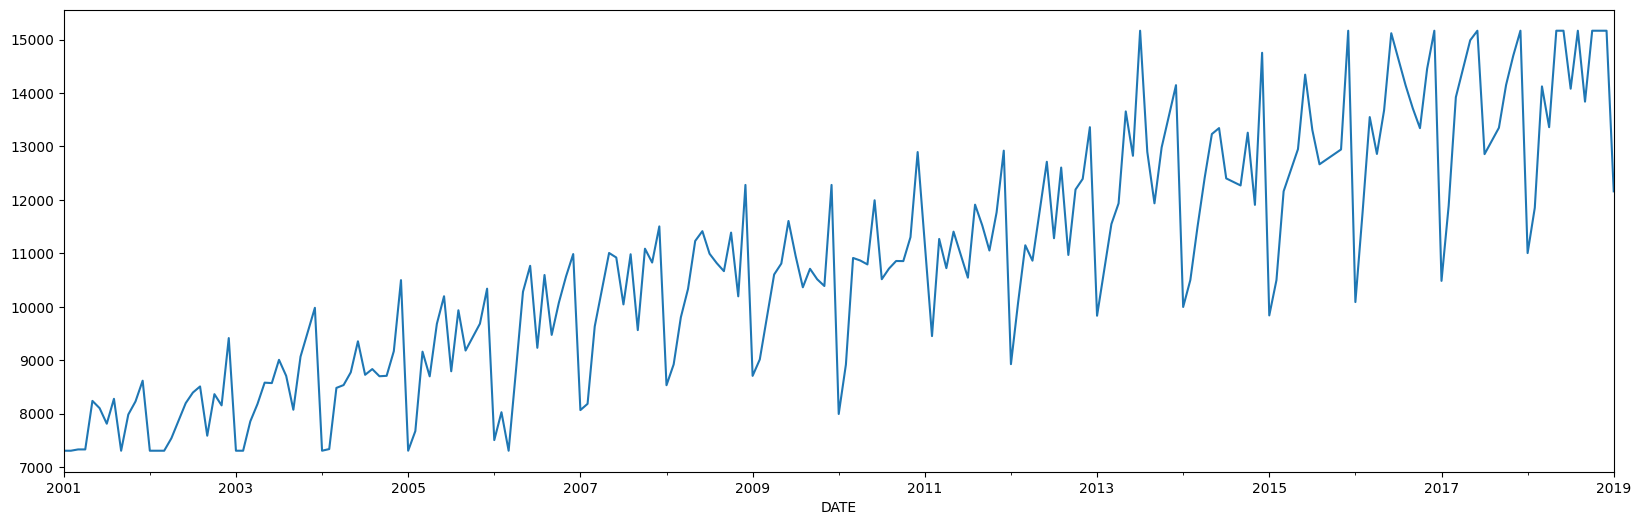

In [ ]:
mobile_sales.Sales.plot();

In [ ]:
import statsmodels.api as sm

model = sm.tsa.seasonal_decompose(mobile_sales.Sales, model='additive')

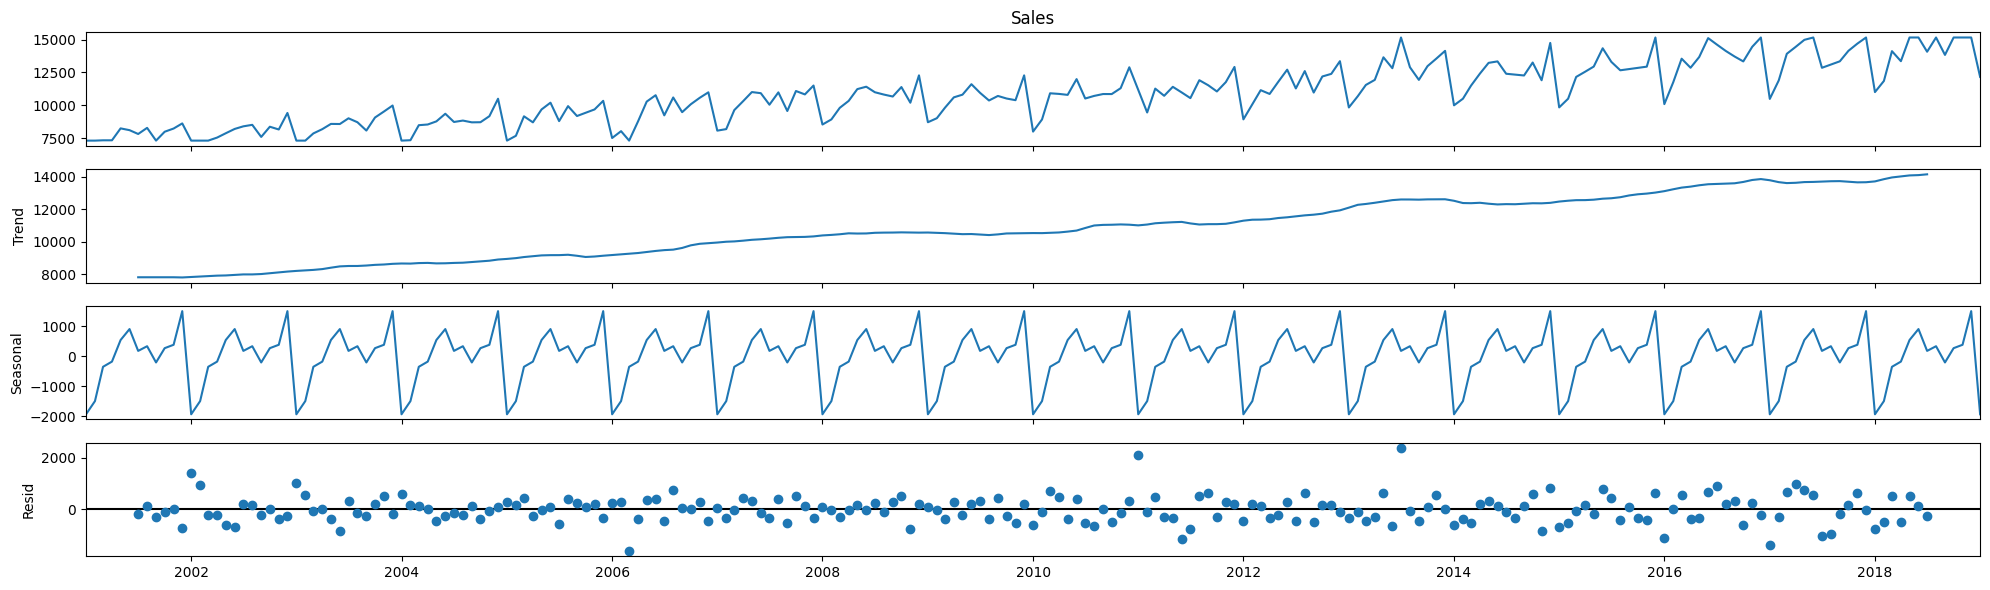

In [ ]:
model.plot();

In [ ]:
model.resid.dropna()

DATE
2001-07-01   -191.926940
2001-08-01    118.218403
2001-09-01   -309.228166
2001-10-01   -117.828166
2001-11-01     19.808109
                 ...    
2018-03-01    511.661050
2018-04-01   -487.939440
2018-05-01    532.887030
2018-06-01    147.248795
2018-07-01   -255.568607
Name: resid, Length: 205, dtype: float64

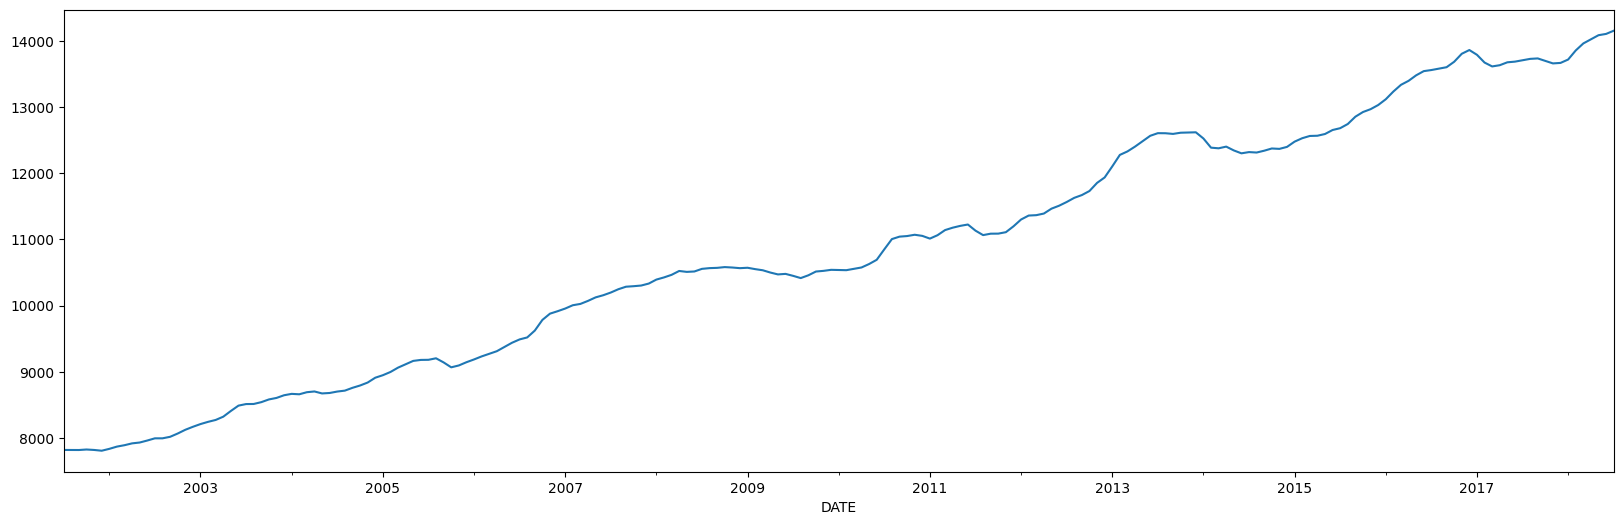

In [ ]:
model.trend.dropna().plot();

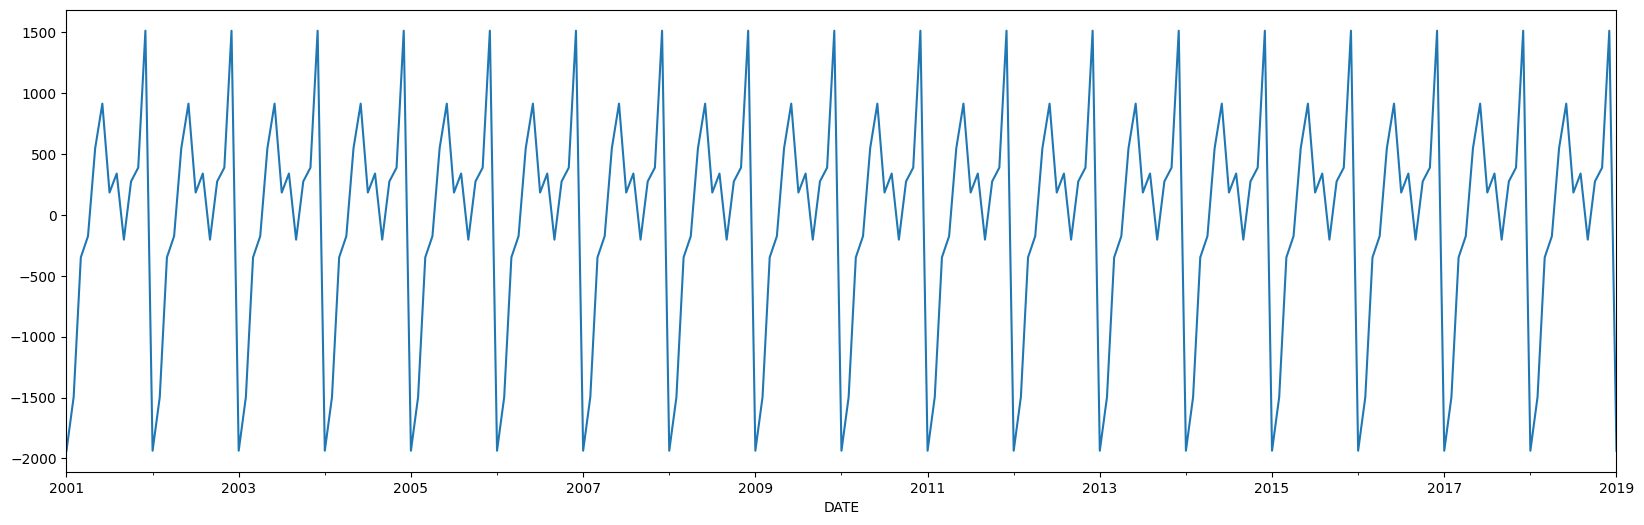

In [ ]:
model.seasonal.dropna().plot();

# Lecture - 2


In [ ]:
train_max_date = mobile_sales.index[-12]
train_x = mobile_sales.loc[mobile_sales.index < mobile_sales.index[-12]].copy()
test_x = mobile_sales.loc[mobile_sales.index >= mobile_sales.index[-12]].copy()

In [ ]:
train_x.shape

(205, 1)

In [ ]:
test_x

Sales
DATE               
2018-02-01  11852.0
2018-03-01  14123.0
2018-04-01  13360.0
2018-05-01  15164.6
2018-06-01  15164.6
2018-07-01  14080.0
2018-08-01  15164.6
2018-09-01  13838.0
2018-10-01  15164.6
2018-11-01  15164.6
2018-12-01  15164.6
2019-01-01  12160.0

In [ ]:
from sklearn.metrics import (
    mean_squared_error as mse,
    mean_absolute_error as mae,
    mean_absolute_percentage_error as mape
)


# Creating a function to print values of all these metrics.
def performance(actual, predicted):
    print('MAE :', round(mae(actual, predicted), 3))
    print('RMSE :', round(mse(actual, predicted)**0.5, 3))
    print('MAPE:', round(mape(actual, predicted), 3))

## Mean Model

In [ ]:
test_x['pred'] = train_x['Sales'].mean()
test_x

Sales      pred
DATE                         
2018-02-01  11852.0  10659.16
2018-03-01  14123.0  10659.16
2018-04-01  13360.0  10659.16
2018-05-01  15164.6  10659.16
2018-06-01  15164.6  10659.16
2018-07-01  14080.0  10659.16
2018-08-01  15164.6  10659.16
2018-09-01  13838.0  10659.16
2018-10-01  15164.6  10659.16
2018-11-01  15164.6  10659.16
2018-12-01  15164.6  10659.16
2019-01-01  12160.0  10659.16

MAE : 3540.89
RMSE : 3725.69
MAPE: 0.244


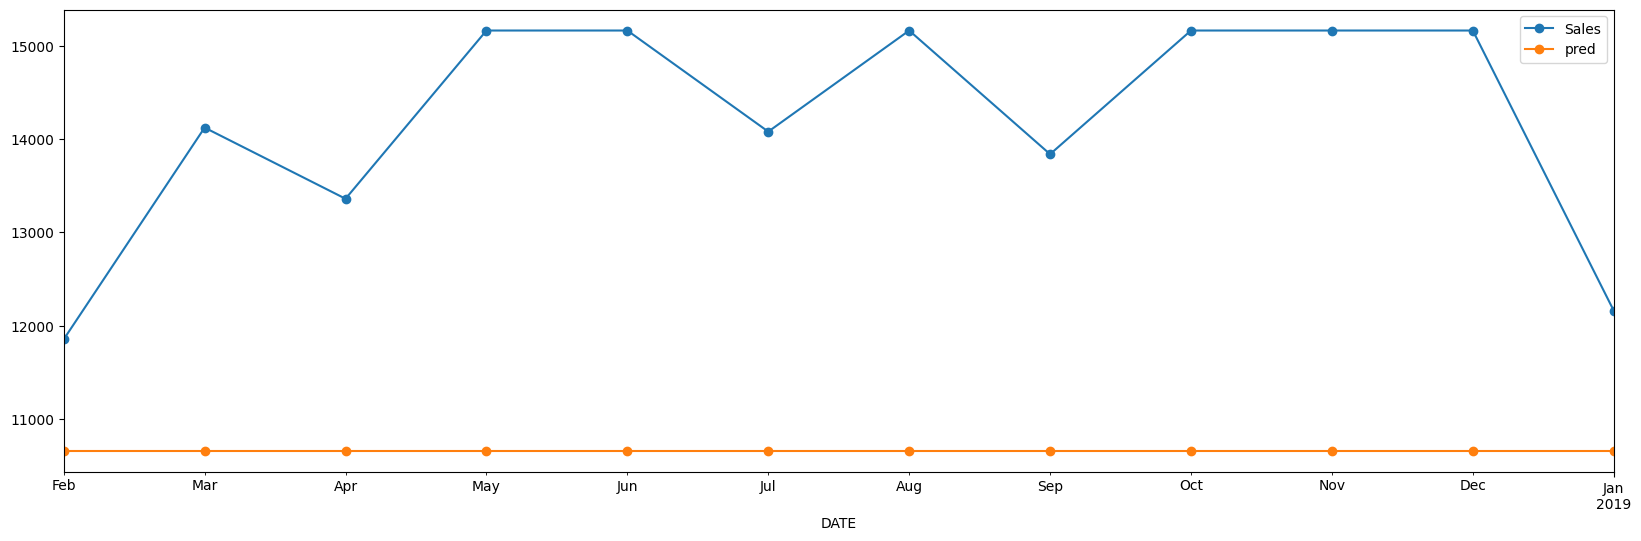

In [ ]:
test_x.plot(style='-o');

performance(test_x["Sales"], test_x['pred'])

## Naive Forecast

MAE : 3195.05
RMSE : 3398.707
MAPE: 0.219


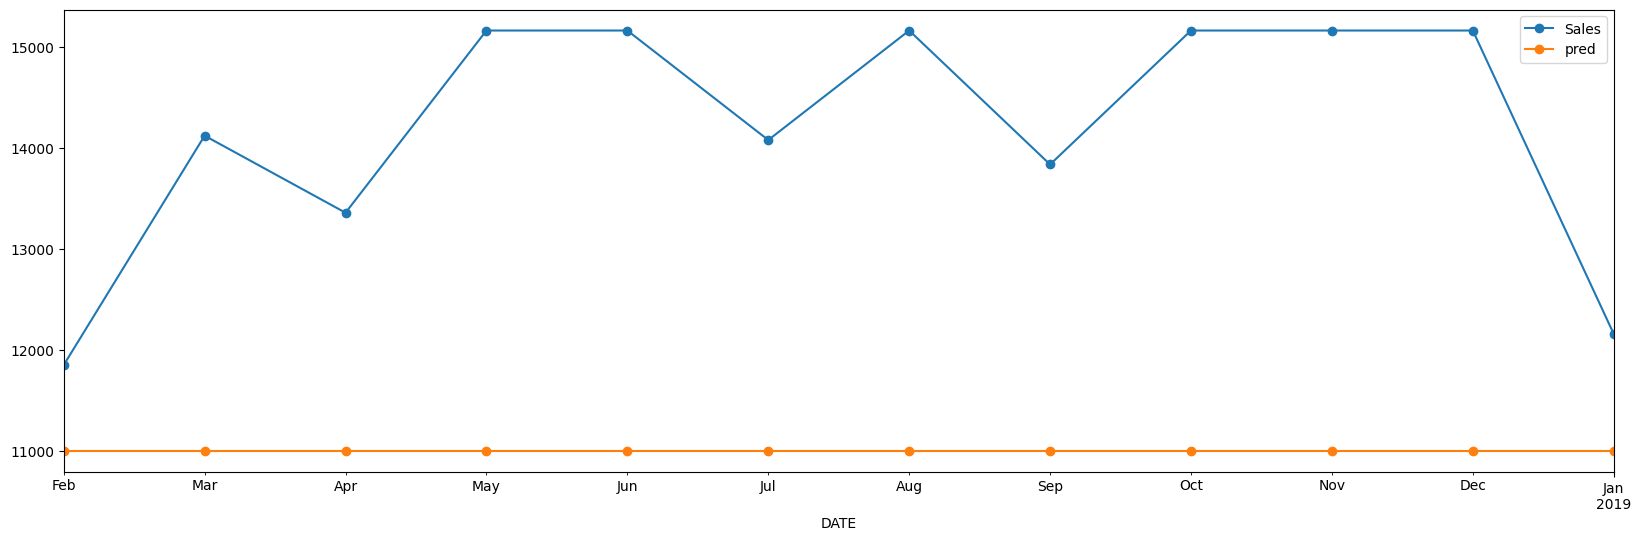

In [ ]:
test_x['pred'] = train_x['Sales'][-1]

test_x.plot(style='-o');

performance(test_x["Sales"], test_x['pred'])

In [ ]:
# for i in test_x.index:

In [ ]:
pd.options.mode.copy_on_write = True

In [ ]:
for i in test_x.index:
    test_x.loc[i, 'pred'] = train_x.loc[i - pd.DateOffset(years=1)]['Sales']

MAE : 660.367
RMSE : 905.569
MAPE: 0.047


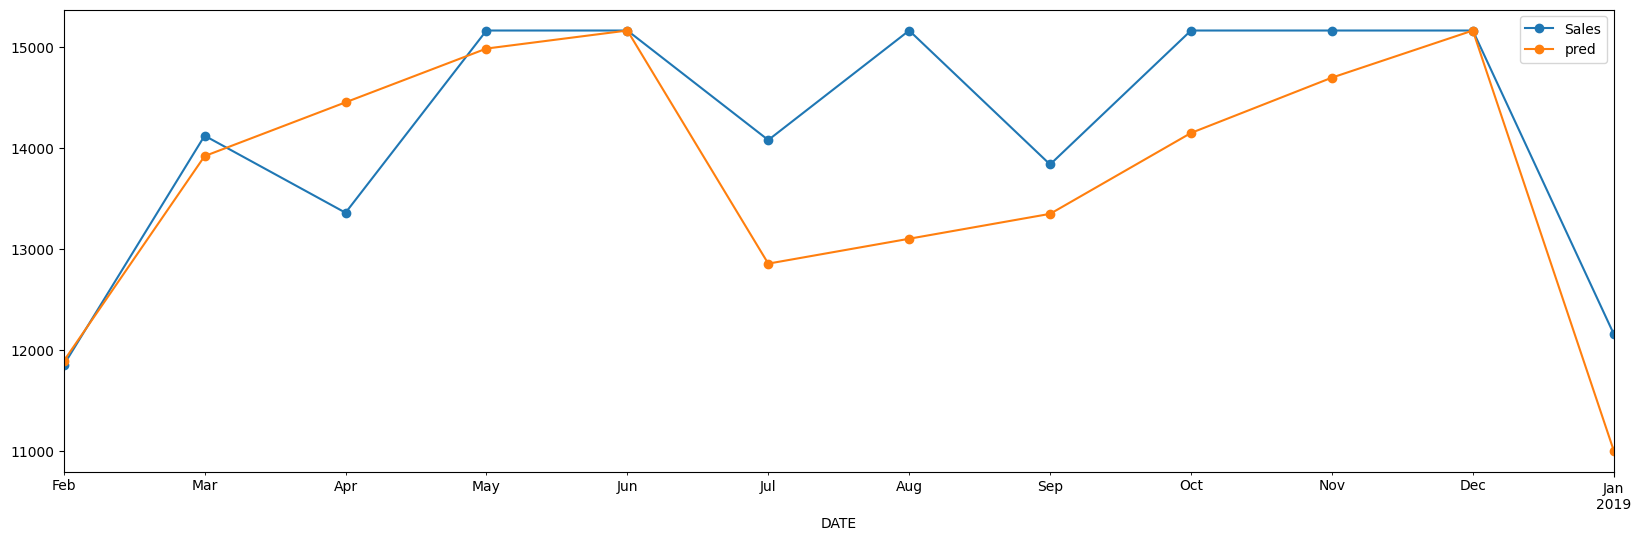

In [ ]:
test_x.plot(style='-o');

performance(test_x["Sales"], test_x['pred'])

In [ ]:
y_t = train_x['Sales'][-1]
y_0 = train_x['Sales'][0]

m = (y_t - y_0) / len(train_x['Sales'])

h = np.linspace(0,len(test_x)-1, len(test_x))

test_x['pred'] = y_t + m * h

MAE : 3095.857
RMSE : 3301.099
MAPE: 0.212


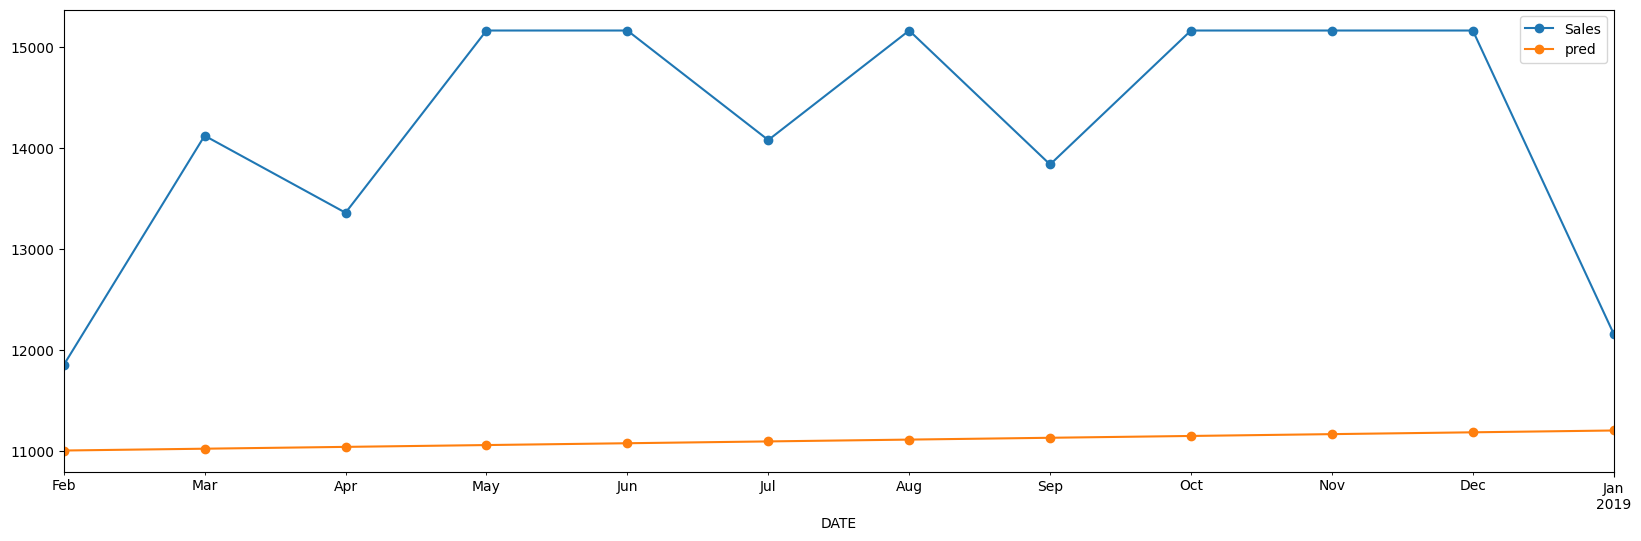

In [ ]:
test_x.plot(style='-o');

performance(test_x["Sales"], test_x['pred'])

MAE : 1175.342
RMSE : 1633.995
MAPE: 0.09


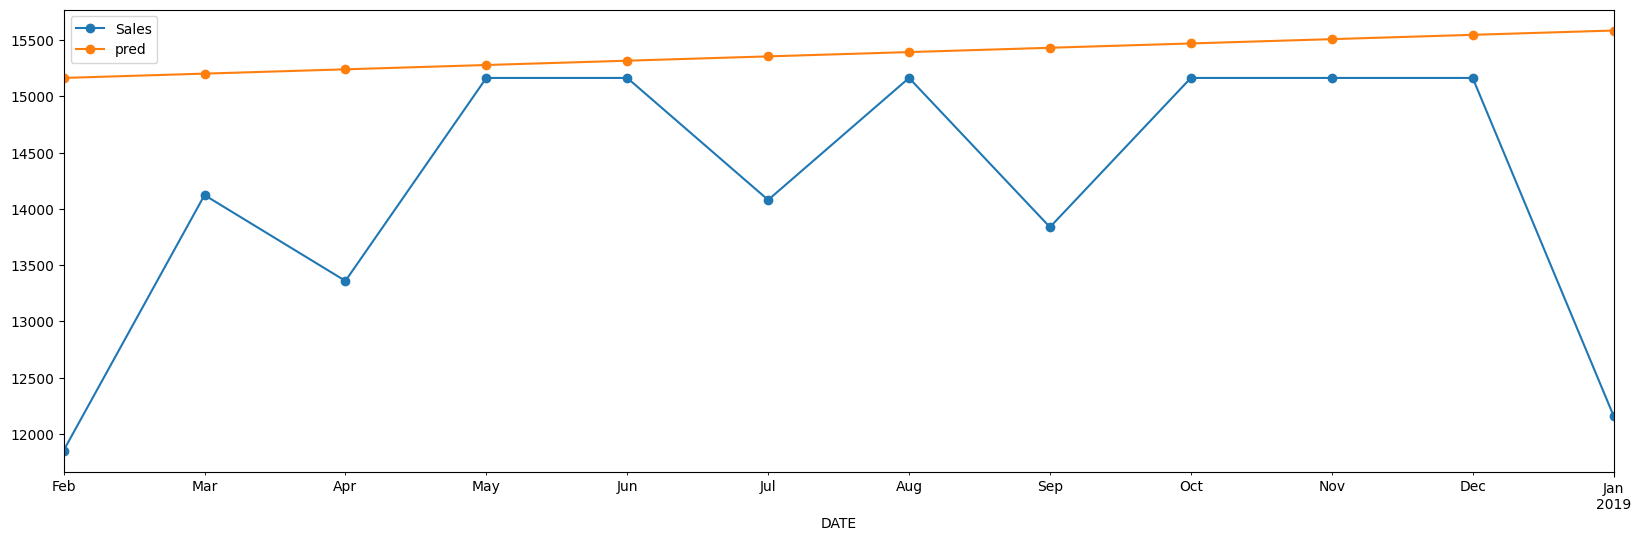

In [ ]:
y_t = train_x['Sales'][-2]
y_0 = train_x['Sales'][0]

m = (y_t - y_0) / len(train_x['Sales'])

h = np.linspace(0,len(test_x)-1, len(test_x))

test_x['pred'] = y_t + m * h


test_x.plot(style='-o');

performance(test_x["Sales"], test_x['pred'])

In [ ]:
# Statement I: Naive method is capable of capturing seasonality.
# Statement II: Forecasting with mean/median value will give a flat forecast around mean/median value.
# Statement III: Seasonal Naive is capable of capturing seasonality as well as trend.

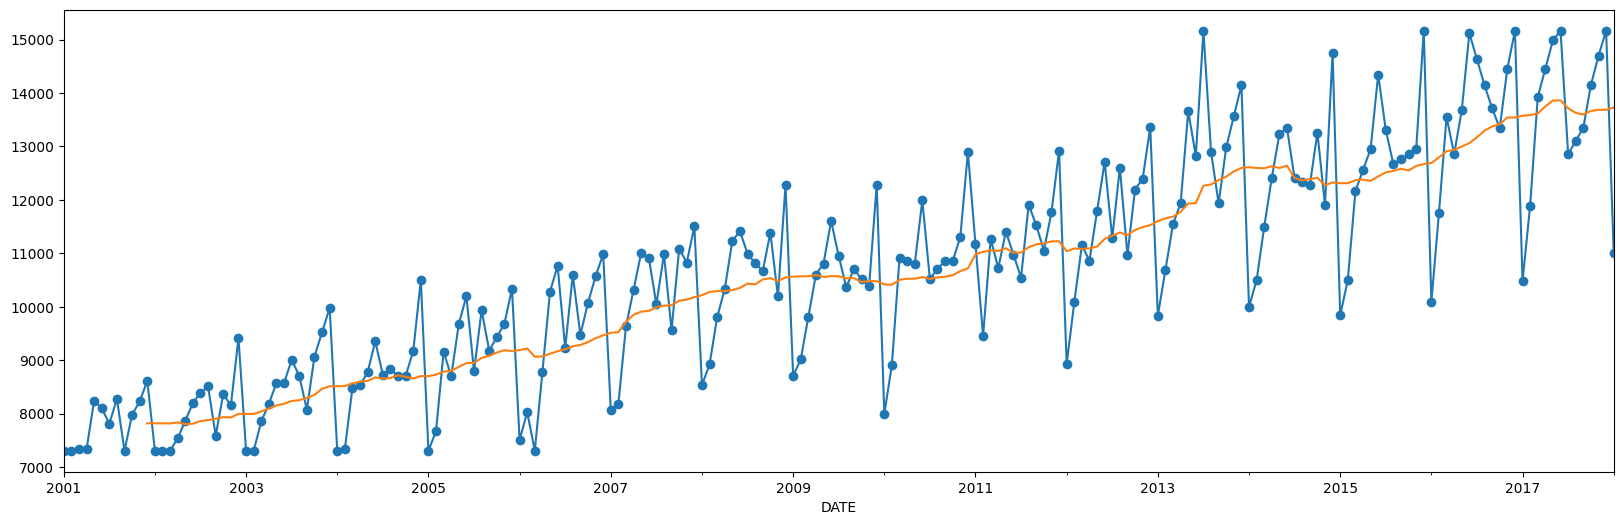

In [ ]:
train_x.Sales.plot(style='-o')
train_x.Sales.rolling(12).mean().plot();
# train_x.Sales.rolling(12, center = True).mean().plot(); # CMA

## Moving Averages

In [ ]:
pred_ = train_x.Sales.copy().values

for i in range(12):
    pred_ = np.append(pred_, pred_[-5:].mean())

test_x['pred'] = pred_[-12:] # predictions

MAE : 1285.231
RMSE : 1437.838
MAPE: 0.09


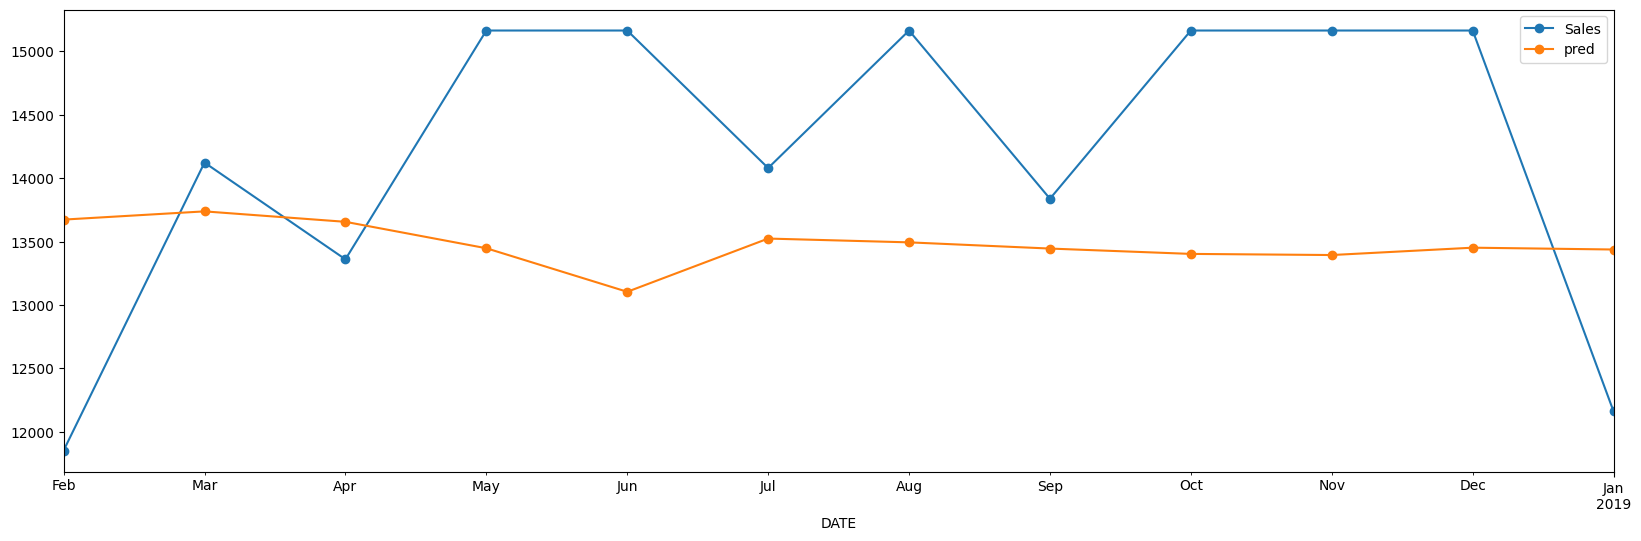

In [ ]:
test_x.plot(style='-o')

performance(test_x['Sales'], test_x['pred'])

## Smoothing Method

In [ ]:
model = sm.tsa.SimpleExpSmoothing(mobile_sales.Sales).fit(smoothing_level = 0.2)
pred = model.forecast(12)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:210: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


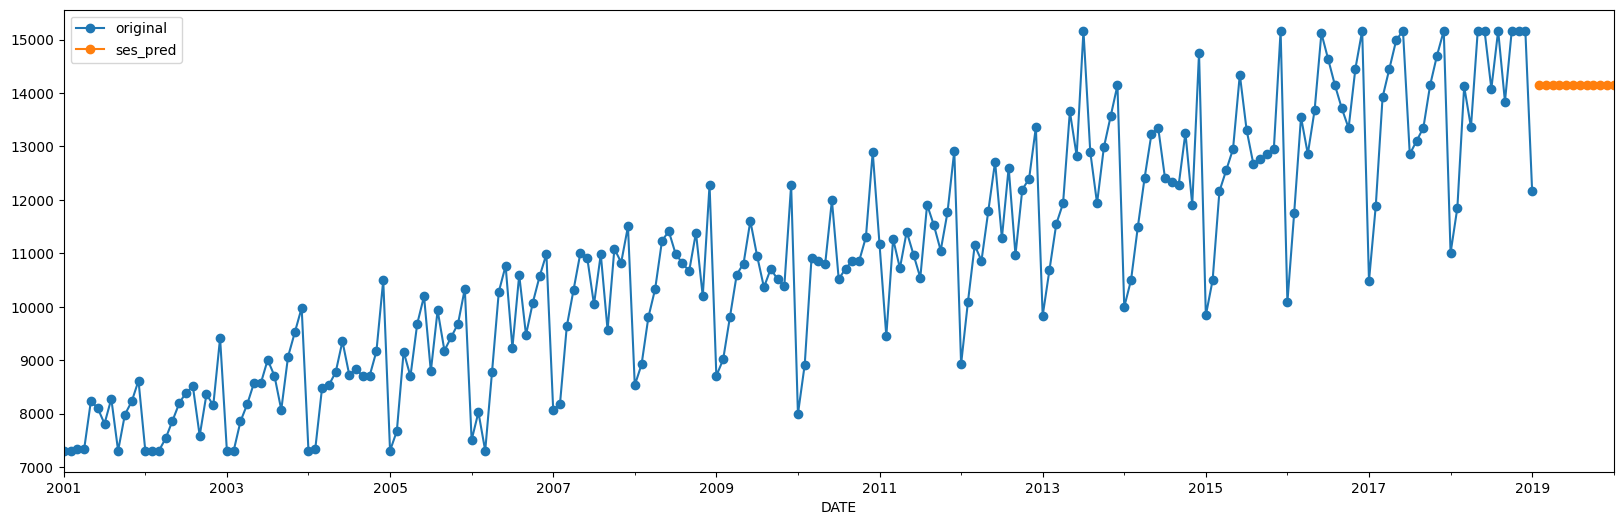

In [ ]:
mobile_sales.Sales.plot(label='original', style='-o')
pred.plot(label='ses_pred', style='-o')
plt.legend()

In [ ]:
model = sm.tsa.SimpleExpSmoothing(train_x.Sales).fit(smoothing_level = 0.2)
test_x['pred'] = model.forecast(12)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:210: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


In [ ]:
test_x

Sales          pred
DATE                             
2018-02-01  11852.0  13531.937024
2018-03-01  14123.0  13531.937024
2018-04-01  13360.0  13531.937024
2018-05-01  15164.6  13531.937024
2018-06-01  15164.6  13531.937024
2018-07-01  14080.0  13531.937024
2018-08-01  15164.6  13531.937024
2018-09-01  13838.0  13531.937024
2018-10-01  15164.6  13531.937024
2018-11-01  15164.6  13531.937024
2018-12-01  15164.6  13531.937024
2019-01-01  12160.0  13531.937024

MAE : 1205.415
RMSE : 1337.625
MAPE: 0.085


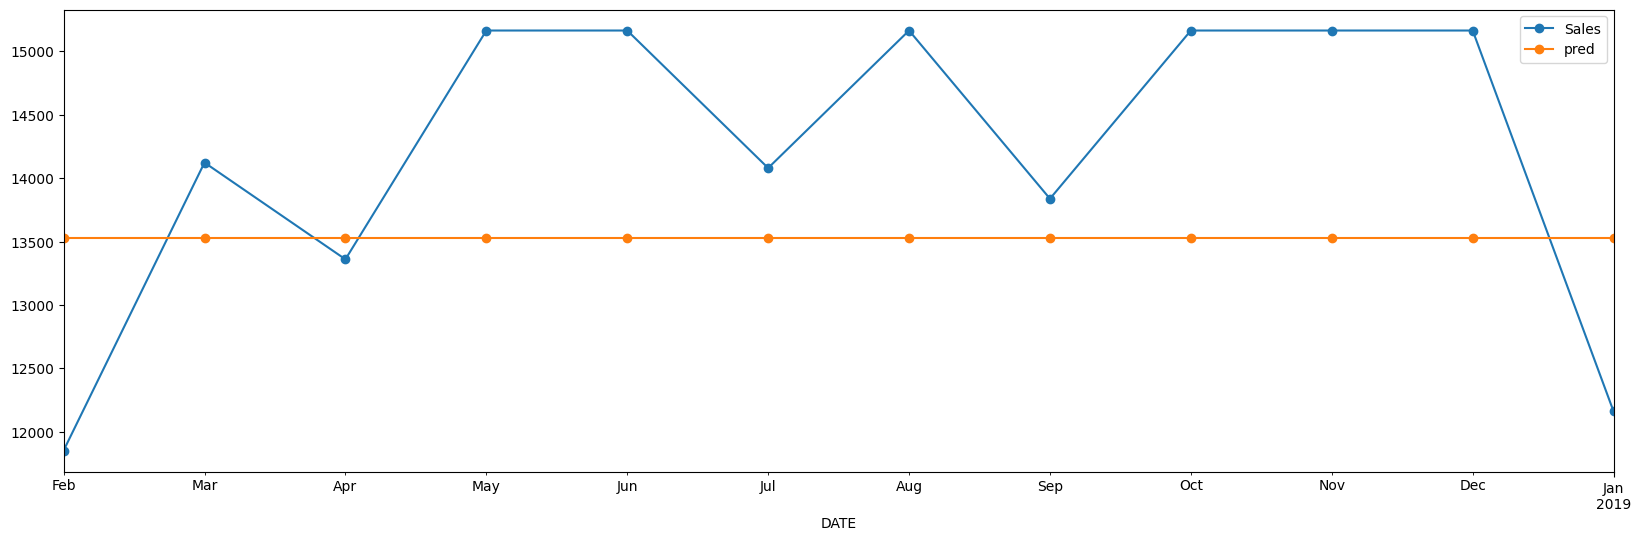

In [ ]:
test_x.plot(style='-o')

performance(test_x['Sales'], test_x['pred'])

# Lecture 3

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


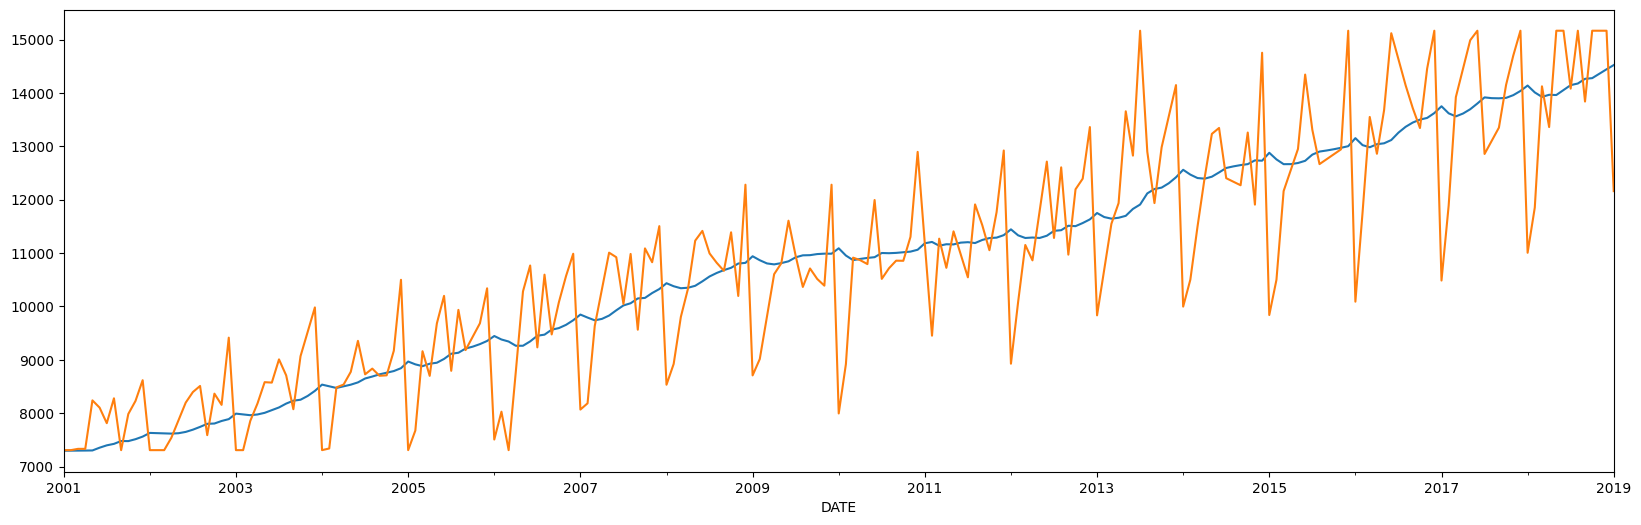

In [ ]:
# 'add' ->'additive model'
model = sm.tsa.ExponentialSmoothing(mobile_sales.Sales, trend='add' ).fit()
model.fittedvalues.plot(label='fitted')
mobile_sales.Sales.plot(label="original")
plt.show()

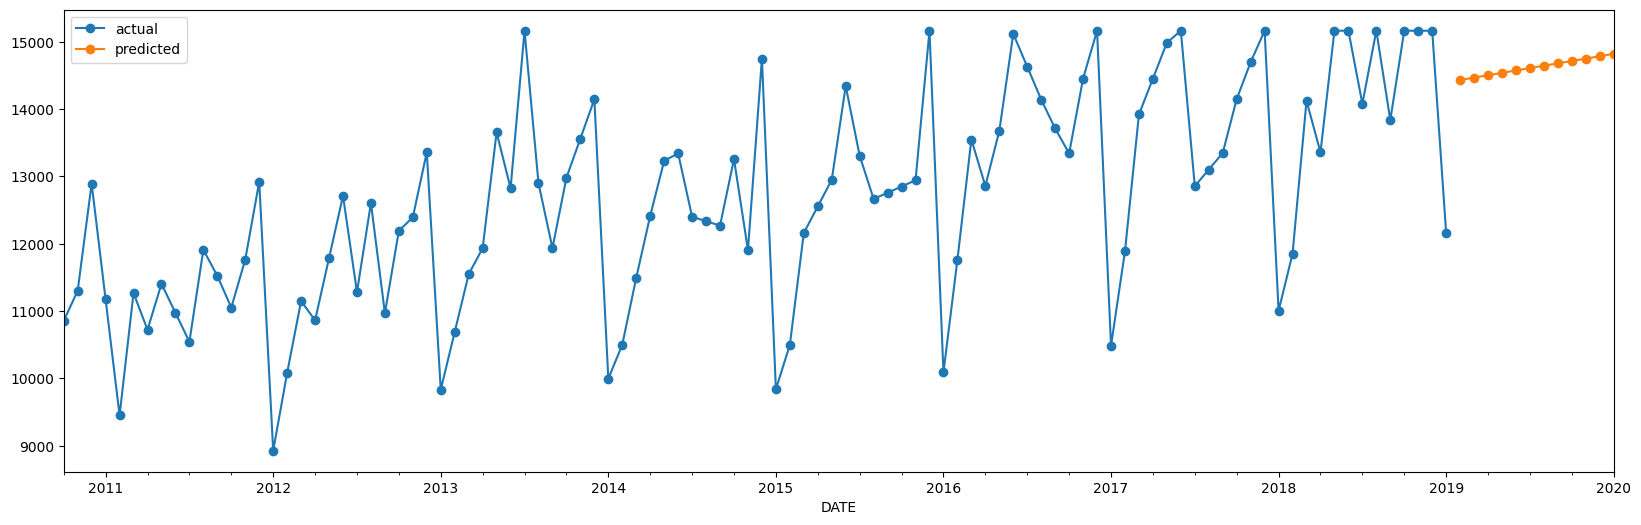

In [ ]:
pred = model.forecast(12)
mobile_sales.Sales.tail(100).plot(style='-o', label='actual')
pred.plot(style='-o', label='predicted')
plt.legend()

In [ ]:
test_x['pred'] = pred.values

In [ ]:
test_x

Sales          pred
DATE                             
2018-02-01  11852.0  14433.256730
2018-03-01  14123.0  14468.496267
2018-04-01  13360.0  14503.735803
2018-05-01  15164.6  14538.975340
2018-06-01  15164.6  14574.214876
2018-07-01  14080.0  14609.454413
2018-08-01  15164.6  14644.693949
2018-09-01  13838.0  14679.933486
2018-10-01  15164.6  14715.173022
2018-11-01  15164.6  14750.412559
2018-12-01  15164.6  14785.652095
2019-01-01  12160.0  14820.891632

MAE : 923.437
RMSE : 1214.06
MAPE: 0.07


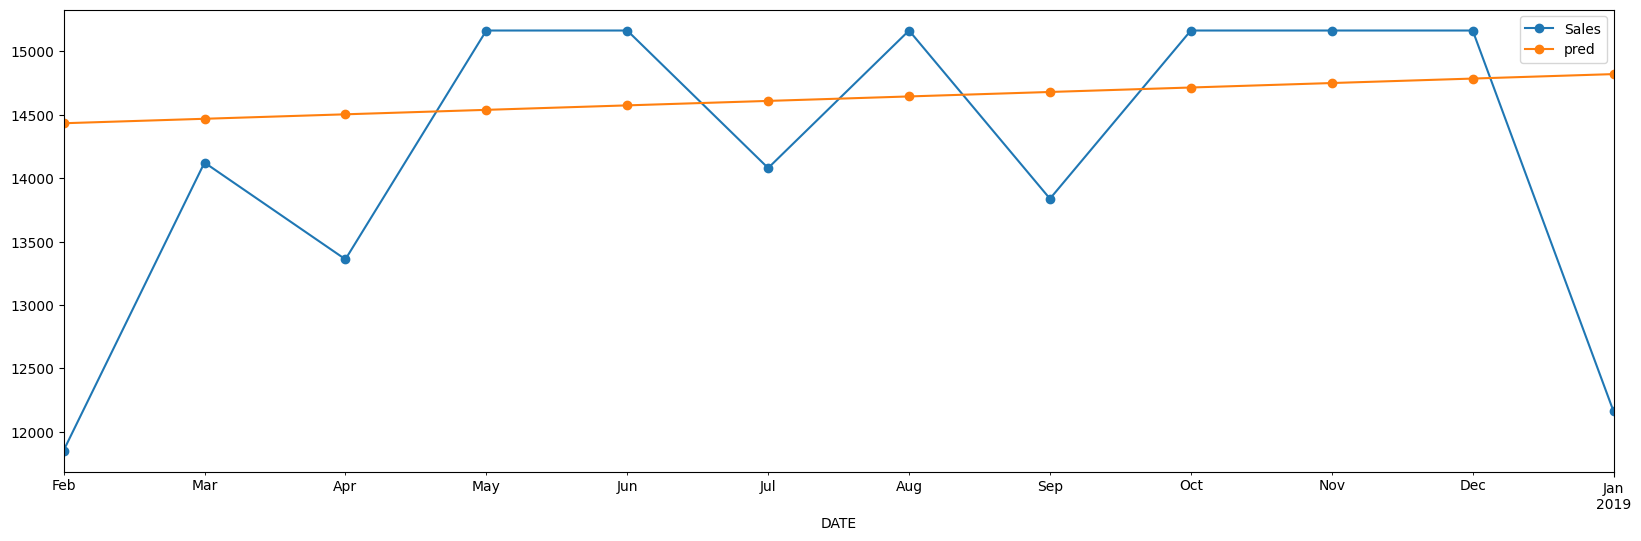

In [ ]:
test_x.plot(style='-o')

performance(test_x['Sales'], test_x['pred'])

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


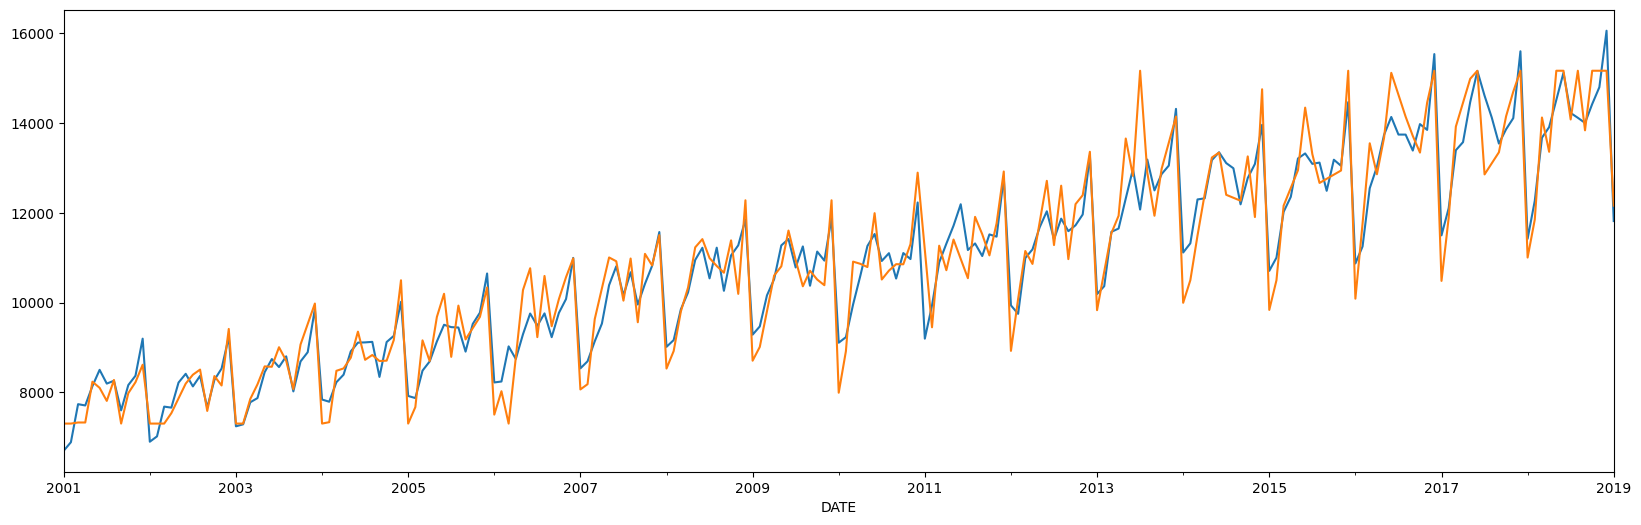

In [ ]:
# 'add' ->'additive model'
model = sm.tsa.ExponentialSmoothing(mobile_sales.Sales, trend='add', seasonal = 'add').fit()
model.fittedvalues.plot(label='fitted')
mobile_sales.Sales.plot(label="original")
plt.show()

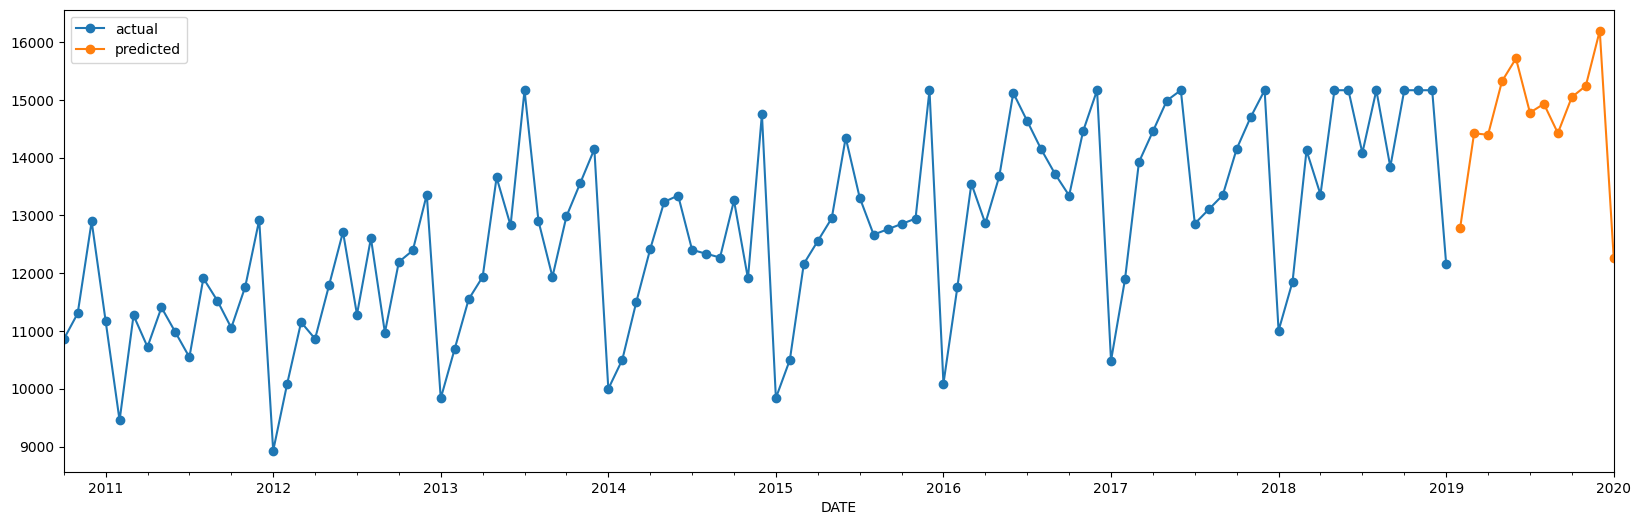

In [ ]:
pred = model.forecast(12)
mobile_sales.Sales.tail(100).plot(style='-o', label='actual')
pred.plot(style='-o', label='predicted')
plt.legend()

In [ ]:
test_x['pred'] = pred.values

MAE : 483.779
RMSE : 599.712
MAPE: 0.035


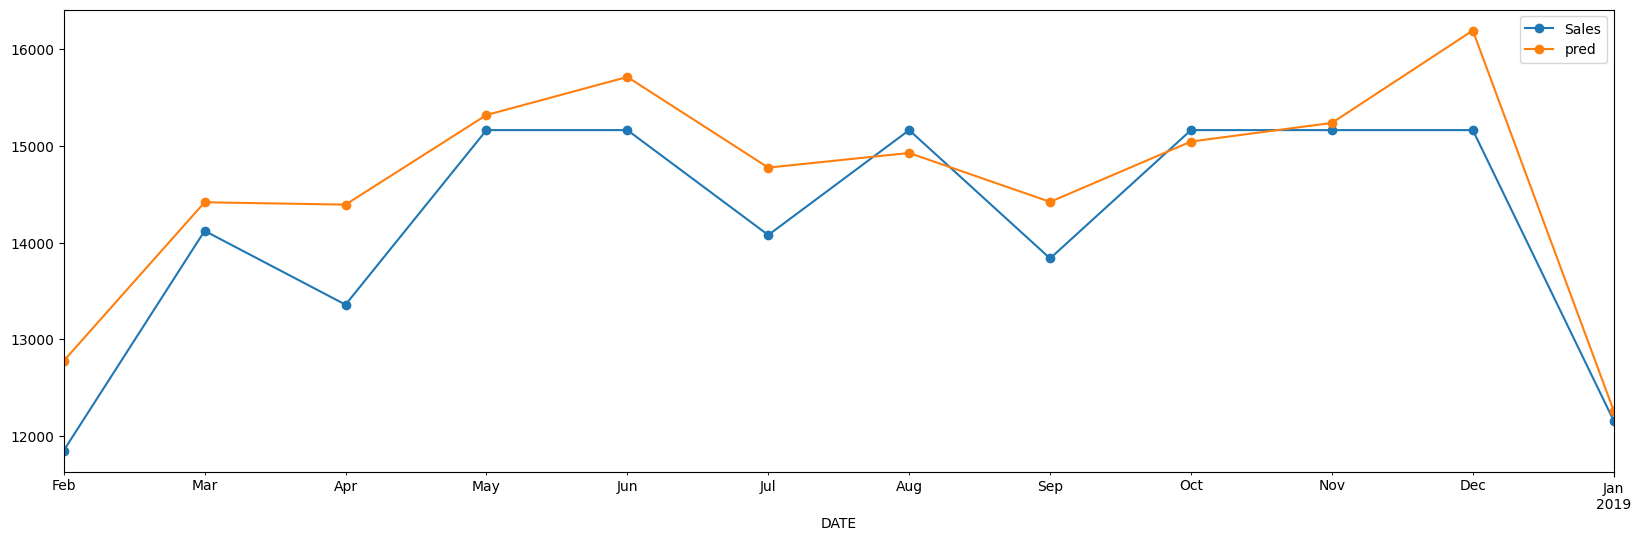

In [ ]:
test_x.plot(style='-o')

performance(test_x['Sales'], test_x['pred'])

<Axes: xlabel='DATE'>

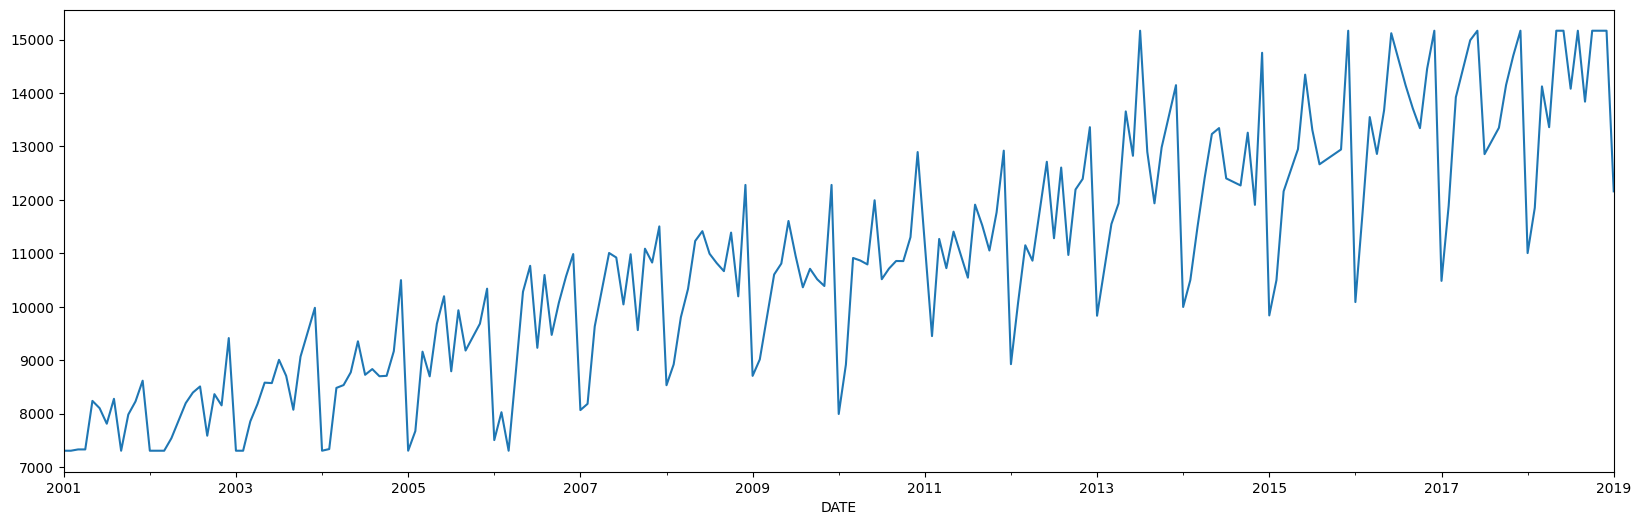

In [ ]:
mobile_sales.Sales.plot()

In [ ]:
sm.tsa.stattools.adfuller(mobile_sales.Sales)[1]

0.9720383666351423

In [ ]:
def adf_test(data, significance_level=0.05):
    pvalue = sm.tsa.stattools.adfuller(data)[1]
    if pvalue <= significance_level:
        print('Sequence is stationary')
    else:
        print('Sequence is not stationary')

adf_test(mobile_sales.Sales)

Sequence is not stationary


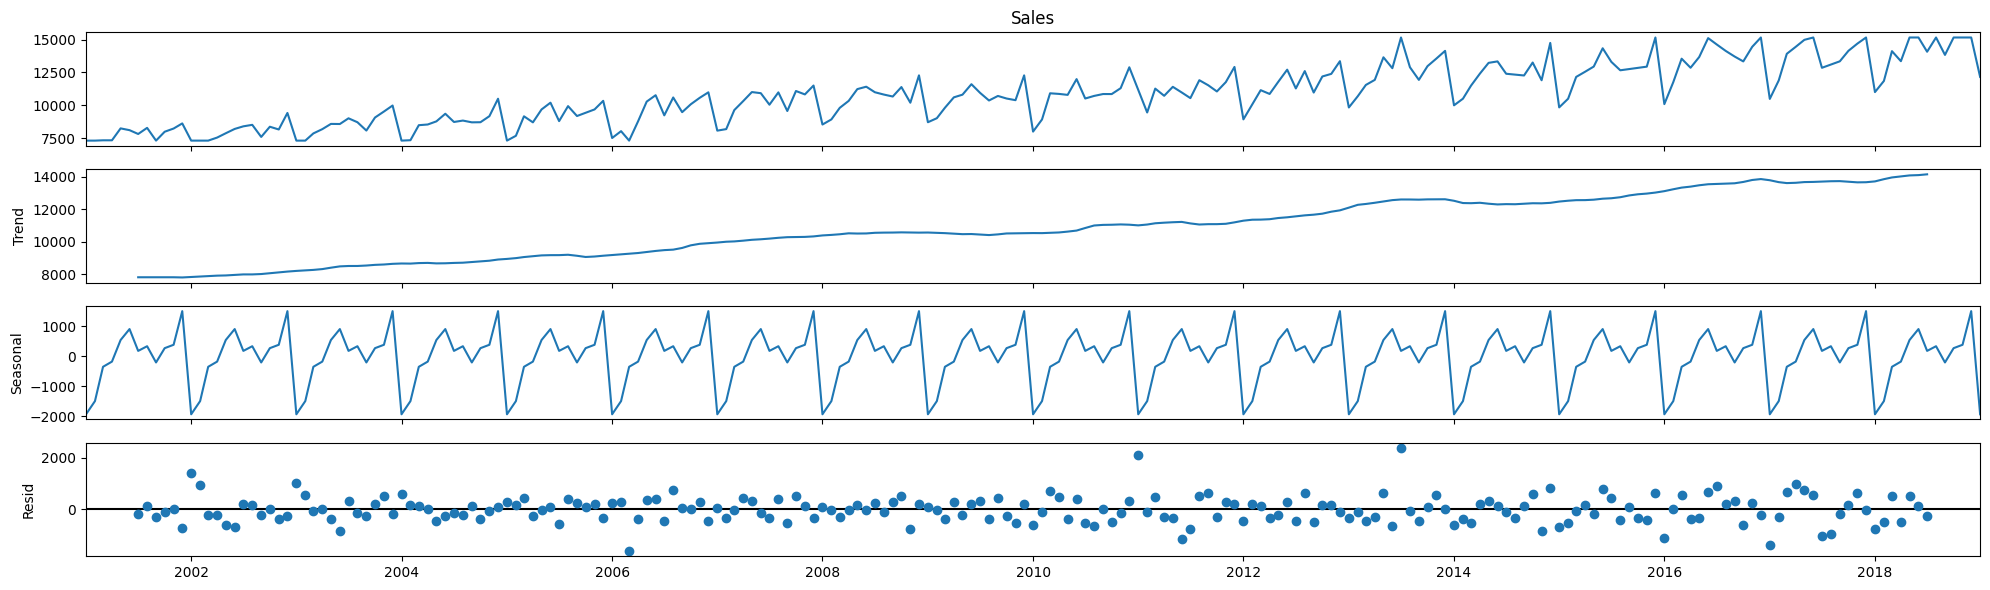

In [ ]:
model = sm.tsa.seasonal_decompose(mobile_sales.Sales, model='additive')
model.plot();

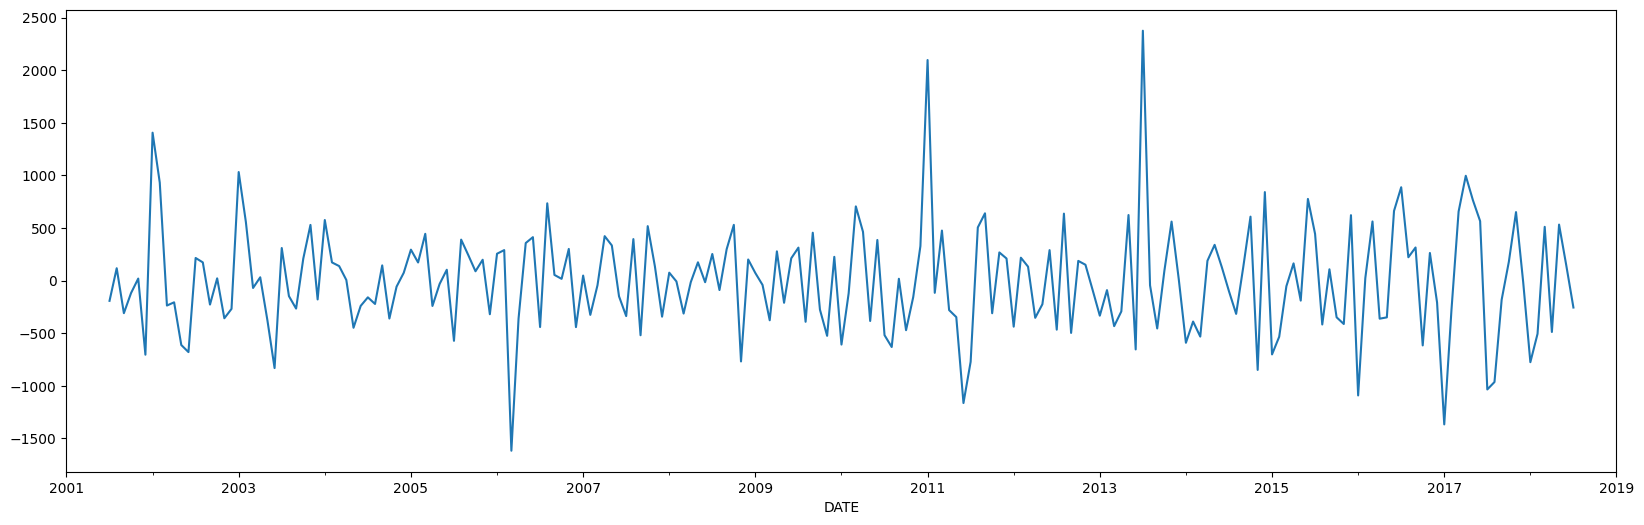

In [ ]:
model.resid.plot();

In [ ]:
adf_test(model.resid.dropna())

Sequence is stationary


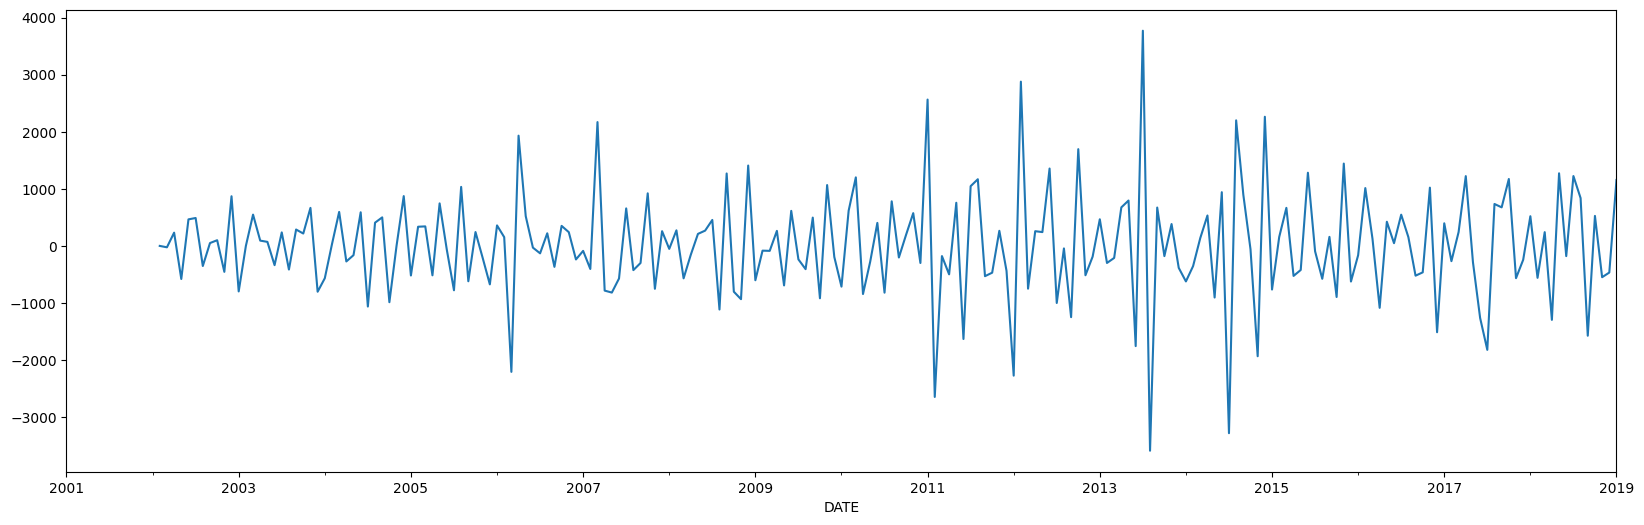

In [ ]:
mobile_sales.Sales.diff(1).diff(12).plot();

In [ ]:
adf_test(mobile_sales.Sales.diff(1).diff(12).dropna())

Sequence is stationary


In [ ]:
original = mobile_sales.Sales[1:]

In [ ]:
shift_1 = mobile_sales.Sales.shift(1).dropna()

In [ ]:
np.corrcoef(original, shift_1)

array([[1.        , 0.81071664],
       [0.81071664, 1.        ]])

<StemContainer object of 3 artists>

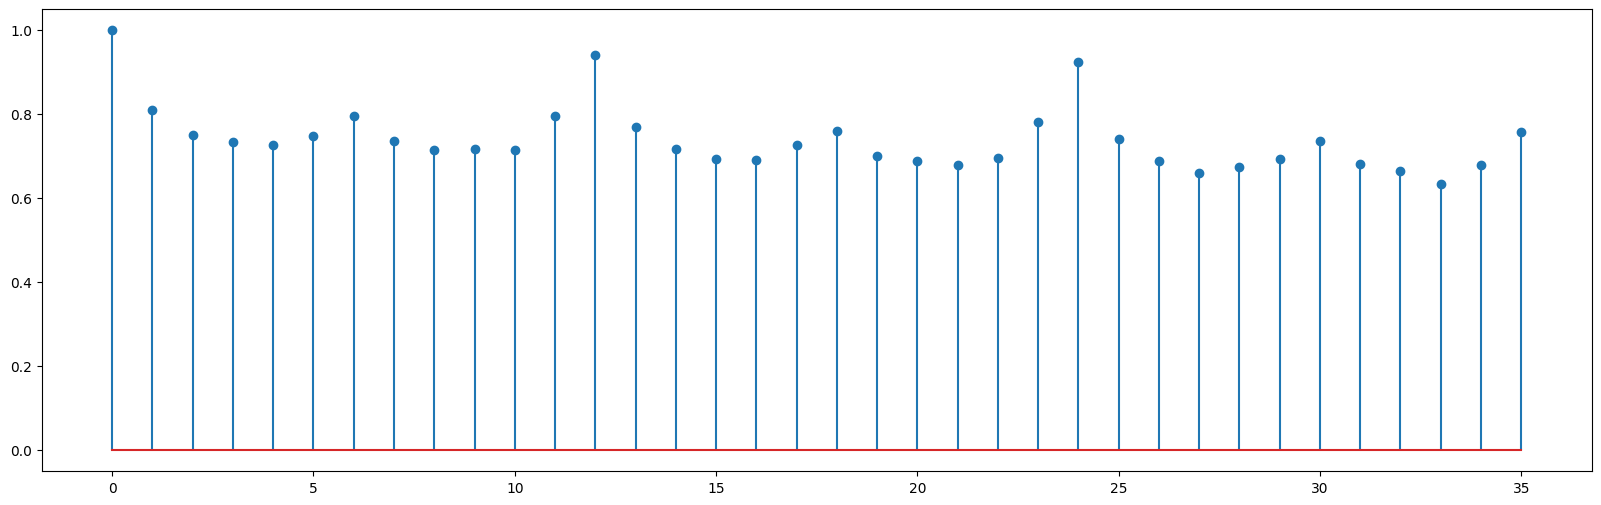

In [ ]:
corr = []
for lag in range(36):
    corr.append(np.corrcoef(mobile_sales.Sales[lag:], mobile_sales.Sales.shift(lag).dropna())[0][1])

plt.stem(np.arange(36), corr)

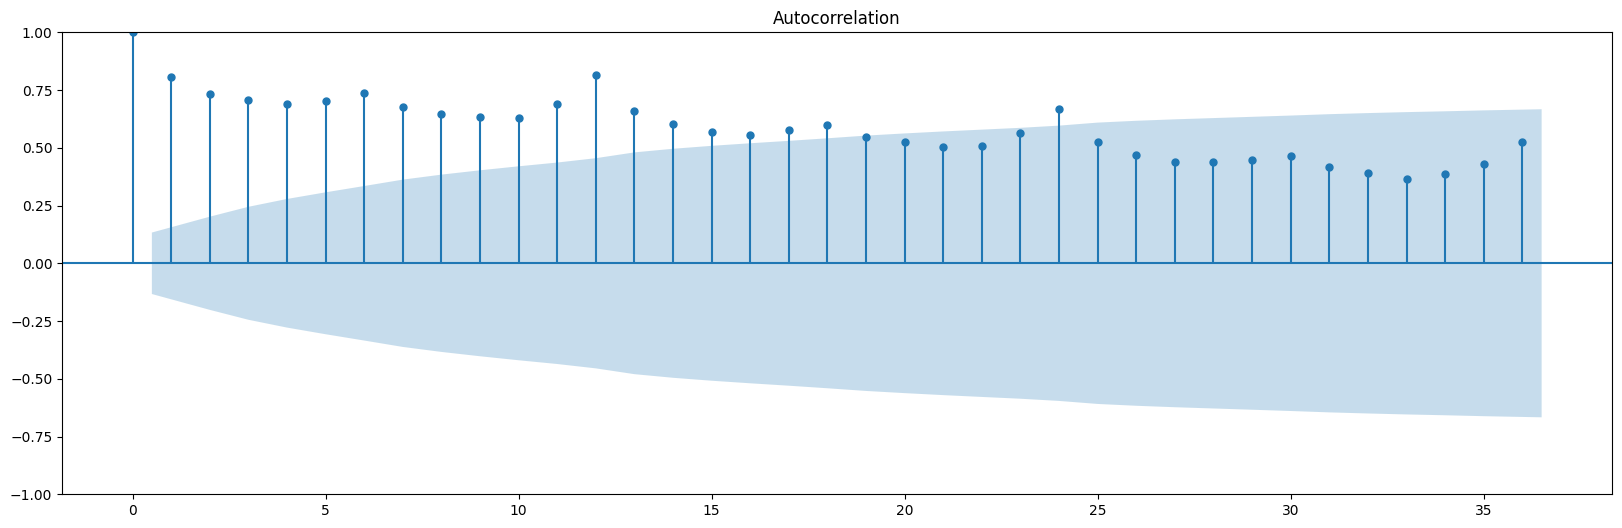

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(mobile_sales.Sales, lags=36);

# Lecture 4
## ARIMA Family

In [ ]:
train_x.head()

Sales
DATE              
2001-01-01  7307.8
2001-02-01  7307.8
2001-03-01  7332.0
2001-04-01  7332.0
2001-05-01  8240.0

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

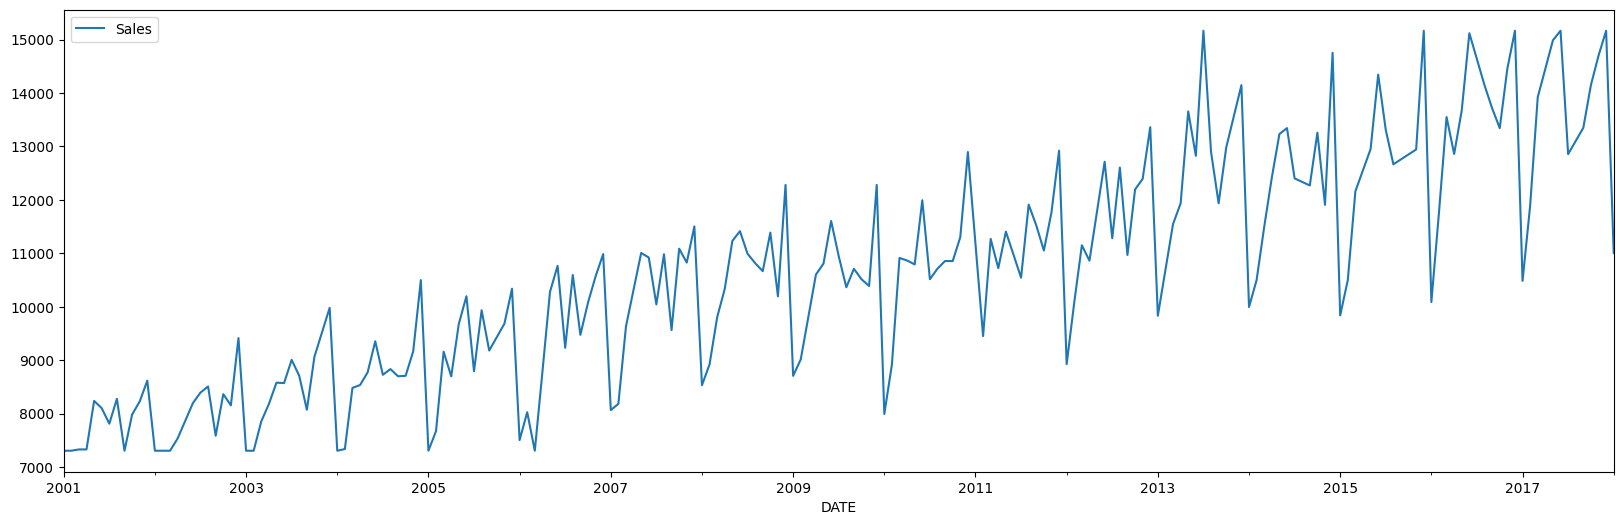

In [ ]:
train_x.plot();

In [ ]:
adf_test(train_x.Sales);

Sequence is not stationary


In [ ]:
train_x_st = train_x.copy()

train_x_st.Sales = train_x_st.Sales.diff(1)
train_x_st.dropna(inplace=True)
adf_test(train_x_st.Sales)

Sequence is stationary


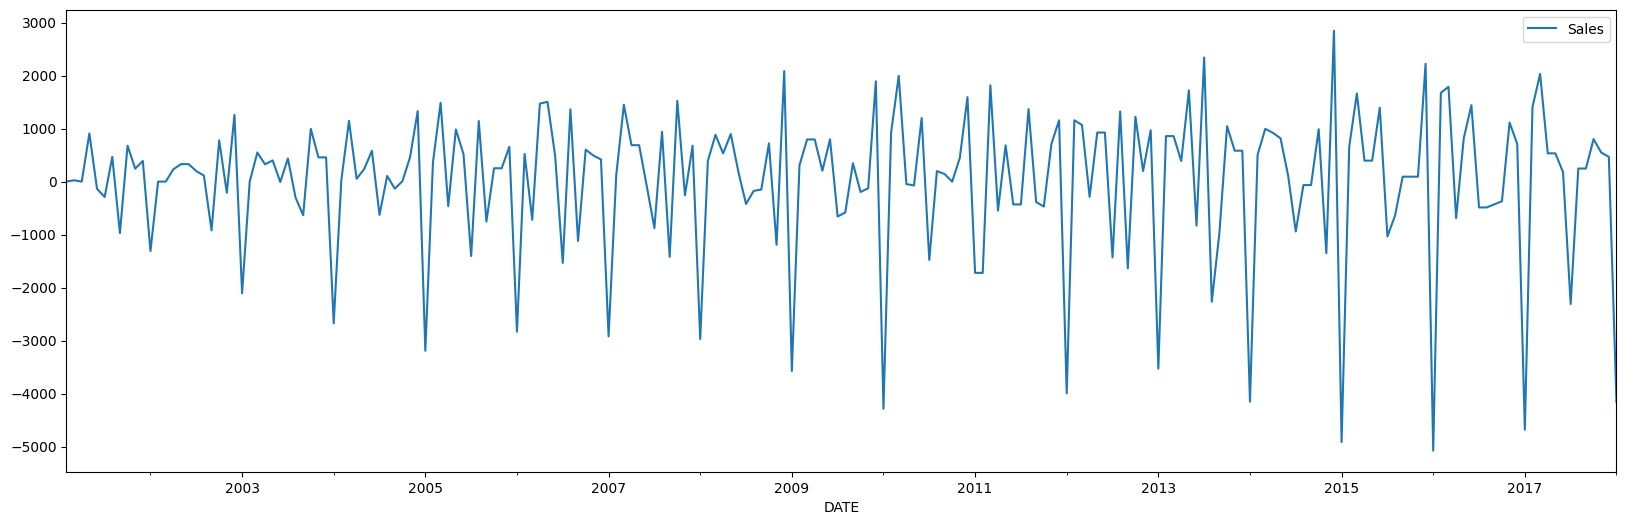

In [ ]:
train_x_st.plot();

In [ ]:
model = SARIMAX(train_x_st.Sales, order = (15, 0, 0)) # AR(15)
model = model.fit(disp = False)
test_x['pred'] = model.forecast(steps=12)


test_x['pred'] = test_x['pred'].cumsum() + train_x.Sales[-1]

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAE : 699.183
RMSE : 900.585
MAPE: 0.05


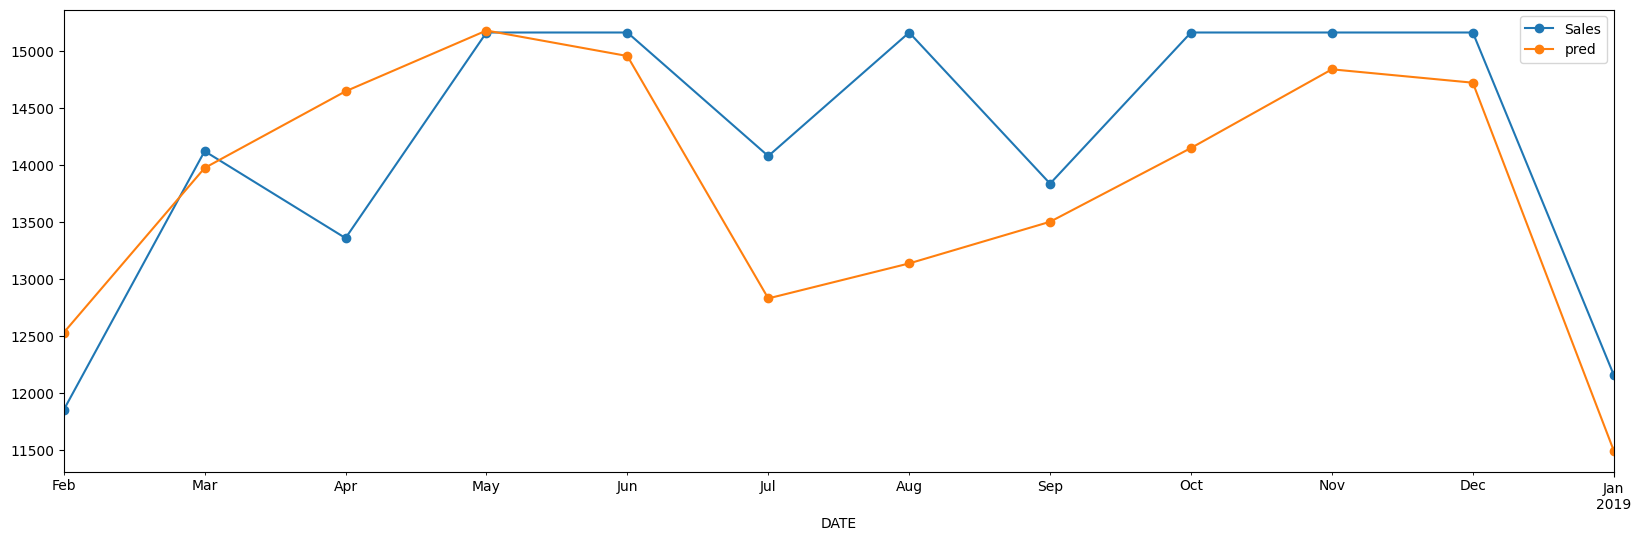

In [ ]:
test_x.plot(style='-o')

performance(test_x['Sales'], test_x['pred'])

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAE : 1095.172
RMSE : 1370.0
MAPE: 0.075


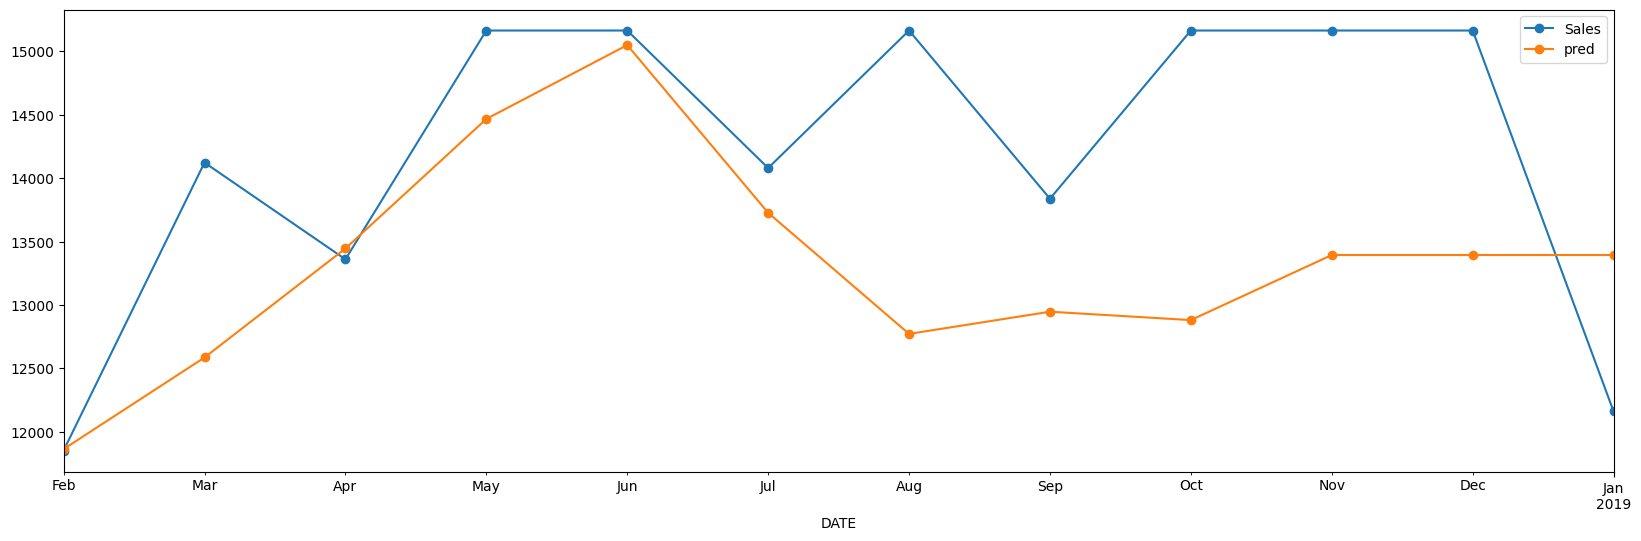

In [ ]:
model = SARIMAX(train_x_st.Sales, order = (0, 0, 10)) # MA(5)
model = model.fit(disp = False)
test_x['pred'] = model.forecast(steps=12)


test_x['pred'] = test_x['pred'].cumsum() + train_x.Sales[-1]

test_x.plot(style='-o')

performance(test_x['Sales'], test_x['pred'])

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAE : 1076.343
RMSE : 1303.345
MAPE: 0.074


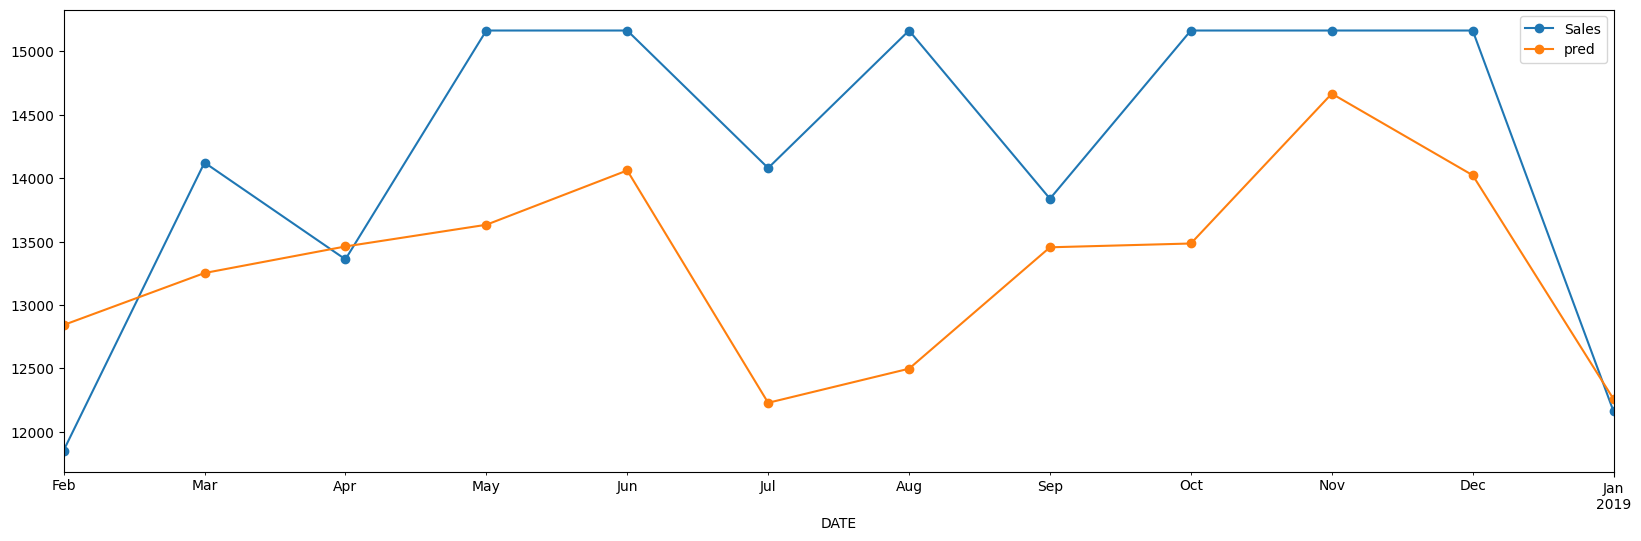

In [ ]:
model = SARIMAX(train_x_st.Sales, order = (5, 0, 10)) # ARMA(10,5)
model = model.fit(disp = False)
test_x['pred'] = model.forecast(steps=12)


test_x['pred'] = test_x['pred'].cumsum() + train_x.Sales[-1]

test_x.plot(style='-o')

performance(test_x['Sales'], test_x['pred'])

### ARIMA(p,d,q)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optim

MAE : 556.706
RMSE : 648.083
MAPE: 0.039


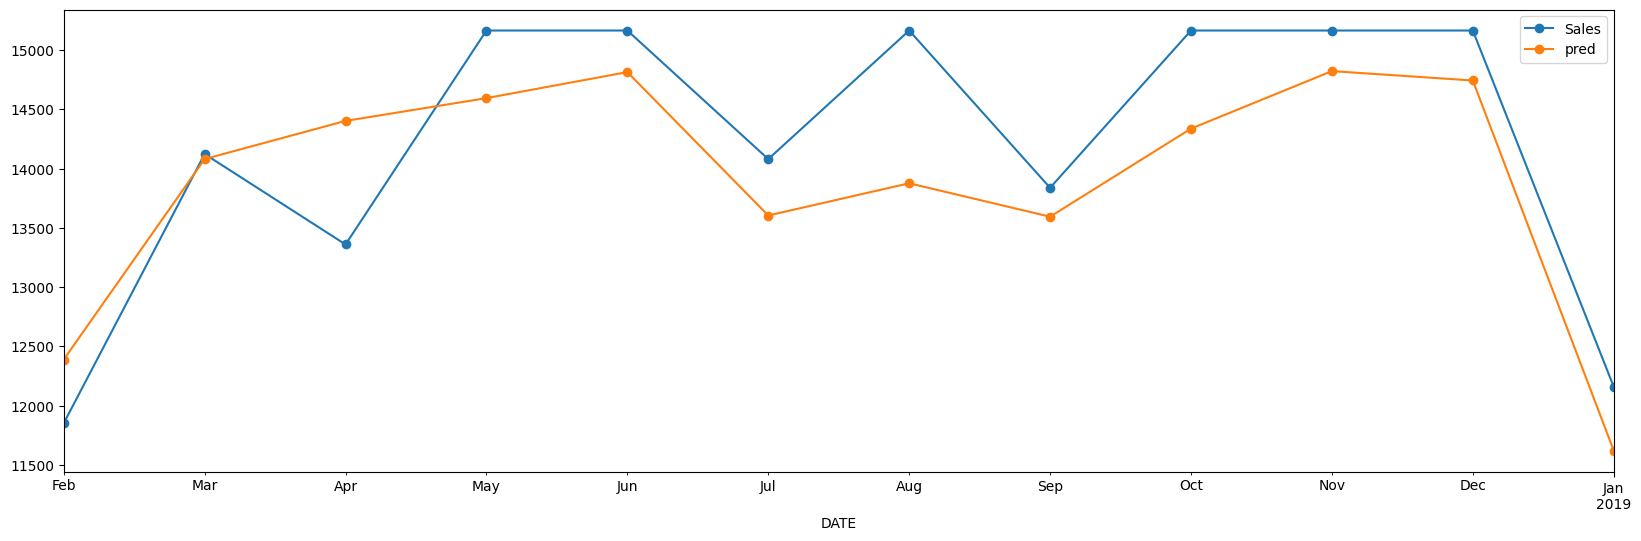

In [ ]:
model = SARIMAX(train_x.Sales, order = (15, 1, 10)) # ARIMA(15,1,10)
model = model.fit(disp = False)

test_x['pred'] = model.forecast(steps=12)

test_x.plot(style='-o')

performance(test_x['Sales'], test_x['pred'])

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


MAE : 1098.554
RMSE : 1198.155
MAPE: 0.077


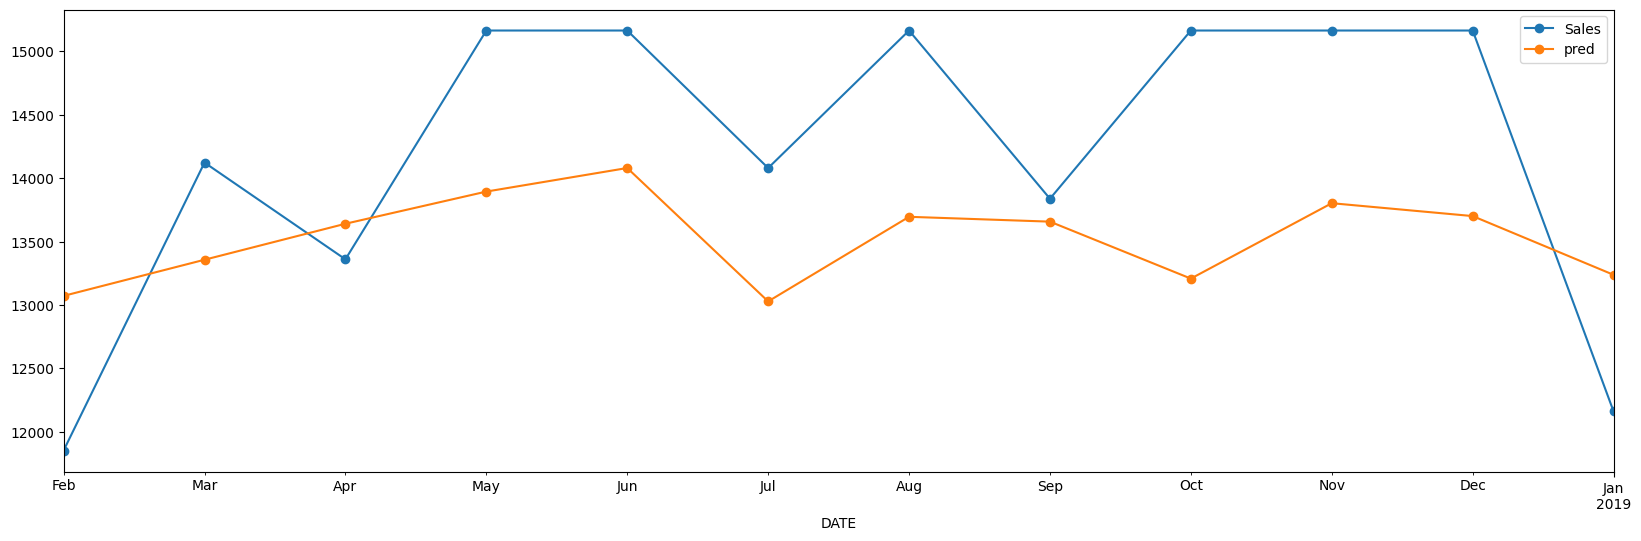

In [ ]:
model = SARIMAX(train_x.Sales, order = (5, 1, 3)) # ARIMA(5,1,3)
model = model.fit(disp = False)

test_x['pred'] = model.forecast(steps=12)

test_x.plot(style='-o')

performance(test_x['Sales'], test_x['pred'])

## SARIMA

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAE : 424.815
RMSE : 508.164
MAPE: 0.031


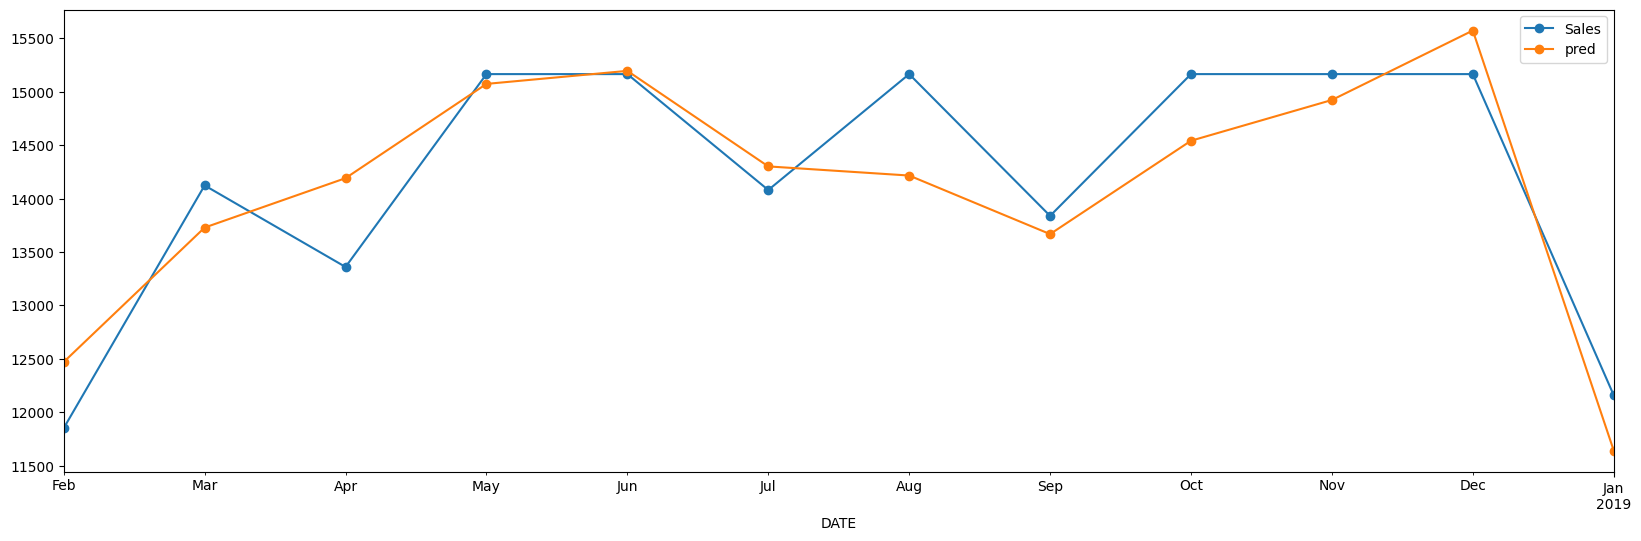

In [ ]:
model = SARIMAX(train_x.Sales, order = (5, 1, 3), seasonal_order = (1, 1, 1, 12)) # ARIMA(5,1,3)
model = model.fit(disp = False)

test_x['pred'] = model.forecast(steps=12)

test_x.plot(style='-o')

performance(test_x['Sales'], test_x['pred'])